In [1]:
# What is normalizing?
# Search scalar in sklearn
# There are several methods inside and see which one to use

# Project 2: Linear Regression Price Predictor for Used Cars

In [2]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

### Section 1: DataFrame Loading, Cleaning

In [3]:
# Returns you all the variables in the current environment

# dir()  

# Refer to this link: https://stackoverflow.com/questions/633127/viewing-all-defined-variables
# To find out out to view all defined variables in the current environment

In [4]:
# What is normalizing?
# Search scalar in sklearn: Done on your variables before fitting them into a Ridge/Lasso model
# Elastic net = combination of Ridge and Lasso.
# There are several methods inside and see which one to use

In [5]:
df_main = pd.read_csv('sgcarmart_used_cars_prices.csv',index_col=0)
df_main.sample(5)

,LISTING_URL,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,REG_DATE,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_PER_YEAR,TRANSMISSION,DEREG_VALUE_FROM_SCRAPE_DATE,SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE
379,https://www.sgcarmart.com/used_cars/info.php?I...,Nissan,53800.0,8550.0,27-Jun-2015,64017.0,2014,742.0,Auto,42467.0,23/10/2019,15430.0,10430.0,61000.0,2068.0,1598,1205.0,1.0,Mid-Sized Sedan
3982,https://www.sgcarmart.com/used_cars/info.php?I...,Toyota,104500.0,16550.0,02-Jun-2014,47638.0,2014,3100.0,Auto,78422.0,23/10/2019,45977.0,56368.0,84504.0,1679.0,3456,2030.0,2.0,MPV
3830,https://www.sgcarmart.com/used_cars/info.php?I...,Toyota,29800.0,6470.0,23-Jun-2009,NaN,2009,742.0,Auto,12850.0,23/10/2019,17500.0,17500.0,13943.0,1678.0,1598,1195.0,3.0,Mid-Sized Sedan
2543,https://www.sgcarmart.com/used_cars/info.php?I...,Subaru,78800.0,10610.0,05-May-2016,59921.0,2016,1210.0,Auto,44917.0,23/10/2019,18941.0,18941.0,47000.0,2371.0,1998,1682.0,1.0,SUV
3712,https://www.sgcarmart.com/used_cars/info.php?I...,Honda,28800.0,5750.0,12-Nov-2009,135701.0,2009,NaN,Auto,NaN,23/10/2019,24280.0,14568.0,NaN,1825.0,1339,1190.0,5.0,Hatchback


In [6]:
df_main.columns

Index(['LISTING_URL', 'BRAND', 'PRICE', 'DEPRE_VALUE_PER_YEAR', 'REG_DATE',
       'MILEAGE_KM', 'MANUFACTURED_YEAR', 'ROAD_TAX_PER_YEAR', 'TRANSMISSION',
       'DEREG_VALUE_FROM_SCRAPE_DATE', 'SCRAPE_DATE', 'OMV', 'ARF',
       'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT', 'ENGINE_CAPACITY_CC',
       'CURB_WEIGHT_KG', 'NO_OF_OWNERS', 'VEHICLE_TYPE'],
      dtype='object')

In [7]:
df_clean = df_main.drop(['LISTING_URL', 'SCRAPE_DATE'],axis=1)
df_clean

,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,REG_DATE,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_PER_YEAR,TRANSMISSION,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE
0,Honda,58800.0,5880.0,24-Oct-2009,81000.0,2008,978.0,Auto,NaN,28040.0,28040.0,NaN,0.0,1799,1219.0,1.0,Mid-Sized Sedan
1,Honda,62800.0,6270.0,10-Nov-2009,106087.0,2009,1628.0,Auto,NaN,33532.0,33532.0,NaN,0.0,2354,1680.0,3.0,MPV
2,Austin,30000.0,16950.0,28-Sep-1972,NaN,1972,NaN,Manual,834.0,NaN,NaN,4711.0,642.0,998,NaN,NaN,Others
3,Audi,70800.0,16580.0,05-Dec-2011,140800.0,2011,2380.0,Auto,58899.0,71379.0,71379.0,75889.0,761.0,2995,2250.0,3.0,SUV
4,Toyota,65800.0,6850.0,26-Jun-2009,117000.0,2009,974.0,Auto,38024.0,23465.0,23465.0,39563.0,3503.0,1797,1350.0,2.0,MPV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3982,Toyota,104500.0,16550.0,02-Jun-2014,47638.0,2014,3100.0,Auto,78422.0,45977.0,56368.0,84504.0,1679.0,3456,2030.0,2.0,MPV
3983,Mercedes-Benz,115000.0,15260.0,11-Mar-2015,51500.0,2012,974.0,Auto,85824.0,52051.0,65692.0,67901.0,1950.0,1796,1600.0,2.0,Sports Car
3984,MINI,119800.0,13150.0,07-Jun-2017,16000.0,2017,1210.0,Auto,69888.0,33570.0,38998.0,53300.0,2769.0,1998,1390.0,1.0,Sports Car
3985,Nissan,81800.0,9900.0,05-Aug-2016,53339.0,2015,1786.0,Auto,60983.0,26629.0,29281.0,57501.0,2462.0,2488,1510.0,1.0,Luxury Sedan


In [8]:
# We see that we have NA entries in this dataset. We want to drop these NA values or they will pose problems for us later

# The null values can be attributed to the fact that some data is not keyed in the listing itself, 
# or formatting issues due to the varying ways of which people organize the information of the car in a single listing

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3987 entries, 0 to 3986
Data columns (total 17 columns):
BRAND                           3987 non-null object
PRICE                           3962 non-null float64
DEPRE_VALUE_PER_YEAR            3876 non-null float64
REG_DATE                        3987 non-null object
MILEAGE_KM                      3338 non-null float64
MANUFACTURED_YEAR               3987 non-null object
ROAD_TAX_PER_YEAR               3833 non-null float64
TRANSMISSION                    3987 non-null object
DEREG_VALUE_FROM_SCRAPE_DATE    3221 non-null float64
OMV                             3963 non-null float64
ARF                             3957 non-null float64
COE_FROM_SCRAPE_DATE            3236 non-null float64
DAYS_OF_COE_LEFT                3963 non-null float64
ENGINE_CAPACITY_CC              3987 non-null int64
CURB_WEIGHT_KG                  3859 non-null float64
NO_OF_OWNERS                    3925 non-null float64
VEHICLE_TYPE                    398

In [9]:
# We now have 2584 rows of data after dropping null values

df_clean.dropna(inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2584 entries, 3 to 3985
Data columns (total 17 columns):
BRAND                           2584 non-null object
PRICE                           2584 non-null float64
DEPRE_VALUE_PER_YEAR            2584 non-null float64
REG_DATE                        2584 non-null object
MILEAGE_KM                      2584 non-null float64
MANUFACTURED_YEAR               2584 non-null object
ROAD_TAX_PER_YEAR               2584 non-null float64
TRANSMISSION                    2584 non-null object
DEREG_VALUE_FROM_SCRAPE_DATE    2584 non-null float64
OMV                             2584 non-null float64
ARF                             2584 non-null float64
COE_FROM_SCRAPE_DATE            2584 non-null float64
DAYS_OF_COE_LEFT                2584 non-null float64
ENGINE_CAPACITY_CC              2584 non-null int64
CURB_WEIGHT_KG                  2584 non-null float64
NO_OF_OWNERS                    2584 non-null float64
VEHICLE_TYPE                    258

In [10]:
# Taking a look at our data

df_clean.sample(5)

,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,REG_DATE,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_PER_YEAR,TRANSMISSION,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE
1745,Toyota,35000.0,12430.0,05-Oct-2011,108221.0,2011,976.0,Auto,24484.0,21503.0,21503.0,64889.0,396.0,1798,1360.0,1.0,MPV
1768,Mercedes-Benz,95800.0,13440.0,06-Jan-2016,49000.0,2015,740.0,Auto,55252.0,26904.0,24666.0,59200.0,2253.0,1595,1435.0,1.0,SUV
800,Mercedes-Benz,92800.0,11010.0,25-Apr-2017,50000.0,2016,740.0,Auto,52378.0,23830.0,20362.0,49430.0,2736.0,1595,1395.0,1.0,Hatchback
1845,Jaguar,176500.0,16980.0,07-Dec-2016,24091.0,2015,1212.0,Auto,123180.0,77240.0,111032.0,56000.0,2588.0,1999,1804.0,1.0,Luxury Sedan
2805,Toyota,54800.0,5860.0,27-Feb-2009,105000.0,2009,1210.0,Auto,29868.0,23511.0,23511.0,31933.0,3408.0,1998,1540.0,3.0,MPV


In [11]:
print(df_clean.columns,'\n',len(df_clean.columns))

# We have 17 features in our columns

Index(['BRAND', 'PRICE', 'DEPRE_VALUE_PER_YEAR', 'REG_DATE', 'MILEAGE_KM',
       'MANUFACTURED_YEAR', 'ROAD_TAX_PER_YEAR', 'TRANSMISSION',
       'DEREG_VALUE_FROM_SCRAPE_DATE', 'OMV', 'ARF', 'COE_FROM_SCRAPE_DATE',
       'DAYS_OF_COE_LEFT', 'ENGINE_CAPACITY_CC', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'VEHICLE_TYPE'],
      dtype='object') 
 17


### Section 2: Data Categorizing

#### Section 2.1: One-hot encoding TRANSMISSION Column

In [12]:
# Here, we see that there only two options for transmission - Auto or Manual (i.e., Auto or not). 
# Therefore, we can do 1-hot encoding for this

df_clean['TRANSMISSION'].value_counts()

Auto      2547
Manual      37
Name: TRANSMISSION, dtype: int64

In [13]:
# Transmission conversion -> 1 for auto, 0 for manual (just 1 column only)

df_clean['TRANSMISSION_CONVERT'] = df_clean['TRANSMISSION'].apply(lambda x: 1 if x == 'Auto' else 0)
df_clean.drop('TRANSMISSION',axis=1,inplace=True)
df_clean.rename(columns={'TRANSMISSION_CONVERT':"TRANSMISSION"}, inplace=True)  # Renaming column back
df_clean.sample(5)

,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,REG_DATE,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_PER_YEAR,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE,TRANSMISSION
3005,Mercedes-Benz,93800.0,12940.0,15-Jan-2016,45000.0,2015,740.0,55219.0,28046.0,26265.0,56989.0,2252.0,1595,1430.0,2.0,Luxury Sedan,1
2959,Mercedes-Benz,46800.0,15760.0,24-Feb-2011,163200.0,2010,974.0,36141.0,51362.0,51362.0,58910.0,485.0,1796,1650.0,3.0,Luxury Sedan,1
659,Nissan,88888.0,10260.0,25-Mar-2017,58000.0,2016,1210.0,58712.0,23955.0,25537.0,53300.0,2706.0,1997,1626.0,1.0,SUV,1
755,Mercedes-Benz,100800.0,12610.0,02-Aug-2016,32300.0,2016,740.0,60427.0,31201.0,30682.0,55200.0,2469.0,1595,1460.0,1.0,Stationwagon,1
3003,Audi,52800.0,14420.0,28-Oct-2011,103339.0,2011,1194.0,41329.0,47537.0,47537.0,63600.0,734.0,1984,1615.0,3.0,Luxury Sedan,1


In [14]:
# Performing whitespace stripping prior to dtype manipulation
df_clean['VEHICLE_TYPE'].apply(str.strip)
df_clean['VEHICLE_TYPE'].apply(str.lstrip)


# Inspection of the type of Vehicles
df_clean['VEHICLE_TYPE'].value_counts()


# ***** QUESTION *****
# Why don't we manually assign numbers to these instead? 
# i.e. df_clean.replace(to_replace=[{'Luxury Sedan':0},{'SUV':1}])

Luxury Sedan       557
SUV                555
Mid-Sized Sedan    497
Hatchback          389
MPV                278
Sports Car         261
Stationwagon        47
Name: VEHICLE_TYPE, dtype: int64

In [15]:
df_clean.head()

,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,REG_DATE,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_PER_YEAR,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE,TRANSMISSION
3,Audi,70800.0,16580.0,05-Dec-2011,140800.0,2011,2380.0,58899.0,71379.0,71379.0,75889.0,761.0,2995,2250.0,3.0,SUV,1
4,Toyota,65800.0,6850.0,26-Jun-2009,117000.0,2009,974.0,38024.0,23465.0,23465.0,39563.0,3503.0,1797,1350.0,2.0,MPV,1
5,Mercedes-Benz,45000.0,18550.0,21-Sep-2010,126000.0,2010,974.0,31818.0,56154.0,56154.0,41006.0,8.0,1796,1650.0,4.0,Luxury Sedan,1
7,BMW,70800.0,12680.0,23-Apr-2014,41000.0,2013,742.0,54685.0,32459.0,27443.0,78810.0,1610.0,1598,1405.0,2.0,Luxury Sedan,1
9,Audi,89500.0,11910.0,25-Nov-2015,57784.0,2015,624.0,62640.0,29913.0,33879.0,61103.0,2221.0,1395,1480.0,2.0,SUV,1


#### This part may not be necessary due to dummy-variable matching

In [16]:
# The code below doesn't work.

# df_clean['VEHICLE_TYPE_VALUE_REPLACEMENT'] = df_clean['VEHICLE_TYPE'].apply(lambda x: 1 if x == "Luxury Sedan")
# df_clean['VEHICLE_TYPE_VALUE_REPLACEMENT'] = df_clean['VEHICLE_TYPE'].apply(lambda x: 2 if x == 'SUV')
# df_clean['VEHICLE_TYPE_VALUE_REPLACEMENT'] = df_clean['VEHICLE_TYPE'].apply(lambda x: 3 if x == 'Mid-Sized Sedan')
# df_clean['VEHICLE_TYPE_VALUE_REPLACEMENT'] = df_clean['VEHICLE_TYPE'].apply(lambda x: 4 if x == 'Hatchback Sedan')
# df_clean['VEHICLE_TYPE_VALUE_REPLACEMENT'] = df_clean['VEHICLE_TYPE'].apply(lambda x: 5 if x == 'MPV')
# df_clean['VEHICLE_TYPE_VALUE_REPLACEMENT'] = df_clean['VEHICLE_TYPE'].apply(lambda x: 6 if x == 'Sports Car')
# df_clean['VEHICLE_TYPE_VALUE_REPLACEMENT'] = df_clean['VEHICLE_TYPE'].apply(lambda x: 7 if x == 'Stationwagon')
# df_clean['VEHICLE_TYPE_VALUE_REPLACEMENT']

# tried using `else pass` and `else continue`, it still doesn't work


# # Alternative method:
# df_clean.loc[df_clean['VEHICLE_TYPE'] == 'Luxury Sedan','VEHICLE_TYPE_VALUE_REPLACEMENT'] = 1
# df_clean.loc[df_clean['VEHICLE_TYPE'] == 'SUV','VEHICLE_TYPE_VALUE_REPLACEMENT'] = 2
# df_clean.loc[df_clean['VEHICLE_TYPE'] == 'Mid-Sized Sedan','VEHICLE_TYPE_VALUE_REPLACEMENT'] = 3
# df_clean.loc[df_clean['VEHICLE_TYPE'] == 'Hatchback Sedan','VEHICLE_TYPE_VALUE_REPLACEMENT'] = 4
# df_clean.loc[df_clean['VEHICLE_TYPE'] == 'MPV','VEHICLE_TYPE_VALUE_REPLACEMENT'] = 5
# df_clean.loc[df_clean['VEHICLE_TYPE'] == 'Sports Car','VEHICLE_TYPE_VALUE_REPLACEMENT'] = 6
# df_clean.loc[df_clean['VEHICLE_TYPE'] == 'Stationwagon','VEHICLE_TYPE_VALUE_REPLACEMENT'] = 7
# df_clean

In [17]:
df_clean.sample(7)

,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,REG_DATE,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_PER_YEAR,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE,TRANSMISSION
3536,Hyundai,22888.0,5150.0,28-May-2009,161533.0,2009,738.0,11336.0,11465.0,11465.0,12763.0,1618.0,1591,1264.0,1.0,Mid-Sized Sedan,1
1060,Nissan,70668.0,9590.0,13-Jun-2016,34690.0,2016,508.0,46139.0,18974.0,13974.0,53694.0,2400.0,1197,1285.0,1.0,SUV,1
1801,Honda,75800.0,8580.0,19-Oct-2017,34000.0,2017,682.0,44186.0,19416.0,14416.0,41761.0,2590.0,1496,1185.0,1.0,SUV,1
3181,Toyota,90500.0,9570.0,22-Mar-2018,19110.0,2017,976.0,47791.0,19955.0,19955.0,39001.0,3047.0,1798,1355.0,1.0,MPV,1
3762,Mercedes-Benz,53300.0,12140.0,20-Sep-2012,80000.0,2012,740.0,42955.0,35948.0,35948.0,73501.0,737.0,1595,1505.0,3.0,Sports Car,1
2522,Mazda,57200.0,8210.0,29-Dec-2015,60487.0,2015,682.0,43201.0,17812.0,12812.0,54301.0,2255.0,1496,1321.0,1.0,Mid-Sized Sedan,1
175,Toyota,31800.0,6580.0,21-Aug-2009,103000.0,2009,742.0,14166.0,17853.0,17853.0,14664.0,1738.0,1598,1195.0,3.0,Mid-Sized Sedan,1


#### Section 2.2: Datetime conversion

In [18]:
# Converting reg_date to datetime, and Manufactured year to int

df_clean['REG_DATE'] = pd.to_datetime(df_clean['REG_DATE'])
df_clean['MANUFACTURED_YEAR'] = df_clean['MANUFACTURED_YEAR'].astype(int)
df_clean[['REG_DATE','MANUFACTURED_YEAR']].dtypes

REG_DATE             datetime64[ns]
MANUFACTURED_YEAR             int32
dtype: object

In [19]:
df_clean.dtypes

BRAND                                   object
PRICE                                  float64
DEPRE_VALUE_PER_YEAR                   float64
REG_DATE                        datetime64[ns]
MILEAGE_KM                             float64
MANUFACTURED_YEAR                        int32
ROAD_TAX_PER_YEAR                      float64
DEREG_VALUE_FROM_SCRAPE_DATE           float64
OMV                                    float64
ARF                                    float64
COE_FROM_SCRAPE_DATE                   float64
DAYS_OF_COE_LEFT                       float64
ENGINE_CAPACITY_CC                       int64
CURB_WEIGHT_KG                         float64
NO_OF_OWNERS                           float64
VEHICLE_TYPE                            object
TRANSMISSION                             int64
dtype: object

In [20]:
# ONLY RUN THIS CELL ONCE!
df_main['SCRAPE_DATE'] = pd.to_datetime(df_main['SCRAPE_DATE']).dt.year # Convert scrape date to integer to perform operations

In [21]:
df_main['SCRAPE_DATE']

0       2019
1       2019
2       2019
3       2019
4       2019
        ... 
3982    2019
3983    2019
3984    2019
3985    2019
3986    2019
Name: SCRAPE_DATE, Length: 3987, dtype: int64

In [22]:
# Converting current scrape date from main dataframe to datetime object using pandas
from datetime import date

# Obtaining number of years from year of manufacture to current year (metric for how new the car is)
df_clean['CAR_AGE'] = df_main['SCRAPE_DATE'] - df_clean['MANUFACTURED_YEAR'] # Obtaining values for age of car
df_clean['CAR_AGE'].astype(int)

3        8
4       10
5        9
7        6
9        4
        ..
3981     3
3982     5
3983     7
3984     2
3985     4
Name: CAR_AGE, Length: 2584, dtype: int32

In [23]:
# Rearranging Columns 
df_clean = df_clean[['BRAND', 'PRICE', 'DEPRE_VALUE_PER_YEAR', 'MILEAGE_KM', 'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT', 
                    'REG_DATE', 'MANUFACTURED_YEAR', 'CAR_AGE', 'DEREG_VALUE_FROM_SCRAPE_DATE', 'OMV', 'ARF', 
                    'ENGINE_CAPACITY_CC', 'ROAD_TAX_PER_YEAR', 'CURB_WEIGHT_KG',
                    'NO_OF_OWNERS', 'VEHICLE_TYPE', 'TRANSMISSION']]
df_clean.head()

,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,MILEAGE_KM,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,REG_DATE,MANUFACTURED_YEAR,CAR_AGE,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,ENGINE_CAPACITY_CC,ROAD_TAX_PER_YEAR,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE,TRANSMISSION
3,Audi,70800.0,16580.0,140800.0,75889.0,761.0,2011-12-05,2011,8.0,58899.0,71379.0,71379.0,2995,2380.0,2250.0,3.0,SUV,1
4,Toyota,65800.0,6850.0,117000.0,39563.0,3503.0,2009-06-26,2009,10.0,38024.0,23465.0,23465.0,1797,974.0,1350.0,2.0,MPV,1
5,Mercedes-Benz,45000.0,18550.0,126000.0,41006.0,8.0,2010-09-21,2010,9.0,31818.0,56154.0,56154.0,1796,974.0,1650.0,4.0,Luxury Sedan,1
7,BMW,70800.0,12680.0,41000.0,78810.0,1610.0,2014-04-23,2013,6.0,54685.0,32459.0,27443.0,1598,742.0,1405.0,2.0,Luxury Sedan,1
9,Audi,89500.0,11910.0,57784.0,61103.0,2221.0,2015-11-25,2015,4.0,62640.0,29913.0,33879.0,1395,624.0,1480.0,2.0,SUV,1


#### Section 2.3: VEHICLE_TYPE To Dummy Variables

In [24]:
# Making Dummy Variables out of Vehicle Types:

x_vehtype_dummy = patsy.dmatrix('VEHICLE_TYPE',data=df_clean,return_type='dataframe')
x_vehtype_dummy.head()

# Do we drop the "Intercept" column?

,Intercept,VEHICLE_TYPE[T.Luxury Sedan],VEHICLE_TYPE[T.MPV],VEHICLE_TYPE[T.Mid-Sized Sedan],VEHICLE_TYPE[T.SUV],VEHICLE_TYPE[T.Sports Car],VEHICLE_TYPE[T.Stationwagon]
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5,1.0,1.0,0.0,0.0,0.0,0.0,0.0
7,1.0,1.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [25]:
df_clean2 = df_clean.join(x_vehtype_dummy)
df_clean2

,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,MILEAGE_KM,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,REG_DATE,MANUFACTURED_YEAR,CAR_AGE,DEREG_VALUE_FROM_SCRAPE_DATE,...,NO_OF_OWNERS,VEHICLE_TYPE,TRANSMISSION,Intercept,VEHICLE_TYPE[T.Luxury Sedan],VEHICLE_TYPE[T.MPV],VEHICLE_TYPE[T.Mid-Sized Sedan],VEHICLE_TYPE[T.SUV],VEHICLE_TYPE[T.Sports Car],VEHICLE_TYPE[T.Stationwagon]
3,Audi,70800.0,16580.0,140800.0,75889.0,761.0,2011-12-05,2011,8.0,58899.0,...,3.0,SUV,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Toyota,65800.0,6850.0,117000.0,39563.0,3503.0,2009-06-26,2009,10.0,38024.0,...,2.0,MPV,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5,Mercedes-Benz,45000.0,18550.0,126000.0,41006.0,8.0,2010-09-21,2010,9.0,31818.0,...,4.0,Luxury Sedan,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0
7,BMW,70800.0,12680.0,41000.0,78810.0,1610.0,2014-04-23,2013,6.0,54685.0,...,2.0,Luxury Sedan,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0
9,Audi,89500.0,11910.0,57784.0,61103.0,2221.0,2015-11-25,2015,4.0,62640.0,...,2.0,SUV,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3981,Mercedes-Benz,103800.0,13470.0,19000.0,53694.0,2434.0,2016-07-18,2016,3.0,55704.0,...,1.0,Luxury Sedan,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3982,Toyota,104500.0,16550.0,47638.0,84504.0,1679.0,2014-06-02,2014,5.0,78422.0,...,2.0,MPV,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3983,Mercedes-Benz,115000.0,15260.0,51500.0,67901.0,1950.0,2015-03-11,2012,7.0,85824.0,...,2.0,Sports Car,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3984,MINI,119800.0,13150.0,16000.0,53300.0,2769.0,2017-06-07,2017,2.0,69888.0,...,1.0,Sports Car,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Section 2.4: Car Brand Categorization. Includes:
* Splitting them into Dummy Variables
* Indexing them into price range categories (perhaps better metric over vehicle types)
* Converting lesser-known brands into "others"

In [26]:
# Renaming Brand Names to their actual names

df_clean2.loc[df_clean2['BRAND'] == 'Aston','BRAND'] = 'Aston Martin'
df_clean2.loc[df_clean2['BRAND'] == 'Land','BRAND'] = 'Land Rover'
df_clean2.loc[df_clean2['BRAND'] == 'Alfa', 'BRAND'] = 'Alfa Romeo'

In [27]:
# Cleaning whitespaces from the values in "Brand" to prevent any messup later
df_clean2['BRAND'].apply(str.strip)

# Checking the number of brands in the dataset
print("# Of rows in DataFrame in Brands Column:\n", df_clean2.loc[:,'BRAND'])
print("\nValue Counts of Brands:\n", df_clean2.loc[:,'BRAND'].value_counts())
print("\n# of Brands:", len(df_clean2.loc[:,'BRAND'].value_counts()))

# New Column ATAS
# New Column Budget Cars
# Top 20 brands
# Am I comfortable with grouping uncommon cars into others?

# Of rows in DataFrame in Brands Column:
 3                Audi
4              Toyota
5       Mercedes-Benz
7                 BMW
9                Audi
            ...      
3981    Mercedes-Benz
3982           Toyota
3983    Mercedes-Benz
3984             MINI
3985           Nissan
Name: BRAND, Length: 2584, dtype: object

Value Counts of Brands:
 Toyota           405
Mercedes-Benz    374
Honda            309
BMW              286
Mazda            139
Audi             127
Nissan           127
Volkswagen       107
Kia               78
Hyundai           77
Volvo             63
Mitsubishi        58
Subaru            56
Porsche           51
Lexus             49
MINI              40
Suzuki            33
Jaguar            22
Citroen           22
Renault           19
Chevrolet         19
Maserati          18
Land Rover        16
Infiniti          14
Ford              14
Peugeot           13
Ferrari           11
Bentley            6
Lamborghini        6
McLaren            5
Opel               

## Section 3: Data Visualization
* EDA  
* Correlation Matrix  
* Pairplots  

In [28]:
# Engine CC and Curb weight might be related. Since you have a heavier car, you need to design a more powerful engine

# Road tax and Engine CC are definitely related

# Vehicle type is a very terrible way to categorize cars (searched online).
# From a quick google search, 
# There are 12 classes for Vehicle Type, namely Mid-Sized Sedan, 
# Luxury Sedan, Hatchback, MPV, SUV, Sports Car, Stationwagon, 
# All Commercial Vehicles, Van, Truck, Bus/Mini Bus, and Others. 
# Each vehicle is assigned only one Vehicle Type. 

# This classification is vague as premium and mass-market brands produce vehicles in all of these segments.
# Furthermore, a Toyota Camry, a BMW 520i and a Rolls-Royce Ghost are all classified under Luxury Sedan as per the 
# car portal's definition. 

# Vehicle Type is a poor way to segment the vehicles.
# Therefore, might want to drop this classification entirely and just focus on Brands, 
# especially since price is more affected by Brand perception.

# Make and Model (make_model): The make and model of a vehicle tells a lot about the level of prestige of a vehicle. 
# and therefore, the pricing.

# Just the make (brand) alone tells us a lot about the perceived desirability of a vehicle - 
# for instance when we learn that someone drives a BMW, the first thought the layman has is likely "that is a prestigious brand". 
# Therefore, decide to segment the vehicles according to their make.

### Section 3.1: Preliminary Correlation Exploration

### Section 3.1.1: Analysis without including Car Brands for Feature Dropping

In [29]:
df_clean2.columns

Index(['BRAND', 'PRICE', 'DEPRE_VALUE_PER_YEAR', 'MILEAGE_KM',
       'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT', 'REG_DATE',
       'MANUFACTURED_YEAR', 'CAR_AGE', 'DEREG_VALUE_FROM_SCRAPE_DATE', 'OMV',
       'ARF', 'ENGINE_CAPACITY_CC', 'ROAD_TAX_PER_YEAR', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'VEHICLE_TYPE', 'TRANSMISSION', 'Intercept',
       'VEHICLE_TYPE[T.Luxury Sedan]', 'VEHICLE_TYPE[T.MPV]',
       'VEHICLE_TYPE[T.Mid-Sized Sedan]', 'VEHICLE_TYPE[T.SUV]',
       'VEHICLE_TYPE[T.Sports Car]', 'VEHICLE_TYPE[T.Stationwagon]'],
      dtype='object')

In [30]:
df_price_no_brands = df_clean2[['PRICE', 'DEPRE_VALUE_PER_YEAR', 'MILEAGE_KM',
       'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT', 'REG_DATE',
       'MANUFACTURED_YEAR', 'CAR_AGE', 'DEREG_VALUE_FROM_SCRAPE_DATE', 'OMV',
       'ARF', 'ENGINE_CAPACITY_CC', 'ROAD_TAX_PER_YEAR', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'VEHICLE_TYPE', 'TRANSMISSION']]
df_price_no_brands

,PRICE,DEPRE_VALUE_PER_YEAR,MILEAGE_KM,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,REG_DATE,MANUFACTURED_YEAR,CAR_AGE,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,ENGINE_CAPACITY_CC,ROAD_TAX_PER_YEAR,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE,TRANSMISSION
3,70800.0,16580.0,140800.0,75889.0,761.0,2011-12-05,2011,8.0,58899.0,71379.0,71379.0,2995,2380.0,2250.0,3.0,SUV,1
4,65800.0,6850.0,117000.0,39563.0,3503.0,2009-06-26,2009,10.0,38024.0,23465.0,23465.0,1797,974.0,1350.0,2.0,MPV,1
5,45000.0,18550.0,126000.0,41006.0,8.0,2010-09-21,2010,9.0,31818.0,56154.0,56154.0,1796,974.0,1650.0,4.0,Luxury Sedan,1
7,70800.0,12680.0,41000.0,78810.0,1610.0,2014-04-23,2013,6.0,54685.0,32459.0,27443.0,1598,742.0,1405.0,2.0,Luxury Sedan,1
9,89500.0,11910.0,57784.0,61103.0,2221.0,2015-11-25,2015,4.0,62640.0,29913.0,33879.0,1395,624.0,1480.0,2.0,SUV,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3981,103800.0,13470.0,19000.0,53694.0,2434.0,2016-07-18,2016,3.0,55704.0,27886.0,26041.0,1595,740.0,1430.0,1.0,Luxury Sedan,1
3982,104500.0,16550.0,47638.0,84504.0,1679.0,2014-06-02,2014,5.0,78422.0,45977.0,56368.0,3456,3100.0,2030.0,2.0,MPV,1
3983,115000.0,15260.0,51500.0,67901.0,1950.0,2015-03-11,2012,7.0,85824.0,52051.0,65692.0,1796,974.0,1600.0,2.0,Sports Car,1
3984,119800.0,13150.0,16000.0,53300.0,2769.0,2017-06-07,2017,2.0,69888.0,33570.0,38998.0,1998,1210.0,1390.0,1.0,Sports Car,1


In [31]:
# Corr Matrix
df_price_no_brands.corr()

,PRICE,DEPRE_VALUE_PER_YEAR,MILEAGE_KM,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,MANUFACTURED_YEAR,CAR_AGE,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,ENGINE_CAPACITY_CC,ROAD_TAX_PER_YEAR,CURB_WEIGHT_KG,NO_OF_OWNERS,TRANSMISSION
PRICE,1.000000,0.816275,-0.409517,0.182914,0.273379,0.304888,-0.304888,0.924820,0.801592,0.879241,0.630484,0.629361,0.505194,-0.090614,0.054688
DEPRE_VALUE_PER_YEAR,0.816275,1.000000,-0.174560,0.332787,-0.133003,0.031343,-0.031343,0.789711,0.906446,0.879452,0.718868,0.724747,0.459895,0.100187,0.042391
MILEAGE_KM,-0.409517,-0.174560,1.000000,-0.084824,-0.554330,-0.809467,0.809467,-0.405090,-0.113452,-0.135532,-0.007598,-0.005557,-0.063299,0.541356,-0.141413
COE_FROM_SCRAPE_DATE,0.182914,0.332787,-0.084824,1.000000,-0.287075,0.165645,-0.165645,0.413598,0.290350,0.250242,0.290806,0.277985,0.348192,-0.151817,0.118870
DAYS_OF_COE_LEFT,0.273379,-0.133003,-0.554330,-0.287075,1.000000,0.558929,-0.558929,0.177268,-0.075169,-0.034700,-0.110199,-0.098360,-0.023202,-0.306966,0.045058
MANUFACTURED_YEAR,0.304888,0.031343,-0.809467,0.165645,0.558929,1.000000,-1.000000,0.349454,-0.071775,-0.034478,-0.168698,-0.176001,0.040341,-0.665596,0.206029
CAR_AGE,-0.304888,-0.031343,0.809467,-0.165645,-0.558929,-1.000000,1.000000,-0.349454,0.071775,0.034478,0.168698,0.176001,-0.040341,0.665596,-0.206029
DEREG_VALUE_FROM_SCRAPE_DATE,0.924820,0.789711,-0.405090,0.413598,0.177268,0.349454,-0.349454,1.000000,0.767793,0.852555,0.615779,0.600091,0.530281,-0.169197,0.093327
OMV,0.801592,0.906446,-0.113452,0.290350,-0.075169,-0.071775,0.071775,0.767793,1.000000,0.962446,0.789314,0.810202,0.500445,0.203444,0.034570
ARF,0.879241,0.879452,-0.135532,0.250242,-0.034700,-0.034478,0.034478,0.852555,0.962446,1.000000,0.794265,0.800314,0.549176,0.153008,0.033770


In [32]:
# How each feature relates to price
df_price_no_brands.corr()['PRICE'].sort_values(ascending=False)

PRICE                           1.000000
DEREG_VALUE_FROM_SCRAPE_DATE    0.924820
ARF                             0.879241
DEPRE_VALUE_PER_YEAR            0.816275
OMV                             0.801592
ENGINE_CAPACITY_CC              0.630484
ROAD_TAX_PER_YEAR               0.629361
CURB_WEIGHT_KG                  0.505194
MANUFACTURED_YEAR               0.304888
DAYS_OF_COE_LEFT                0.273379
COE_FROM_SCRAPE_DATE            0.182914
TRANSMISSION                    0.054688
NO_OF_OWNERS                   -0.090614
CAR_AGE                        -0.304888
MILEAGE_KM                     -0.409517
Name: PRICE, dtype: float64

(15.0, 0.0)

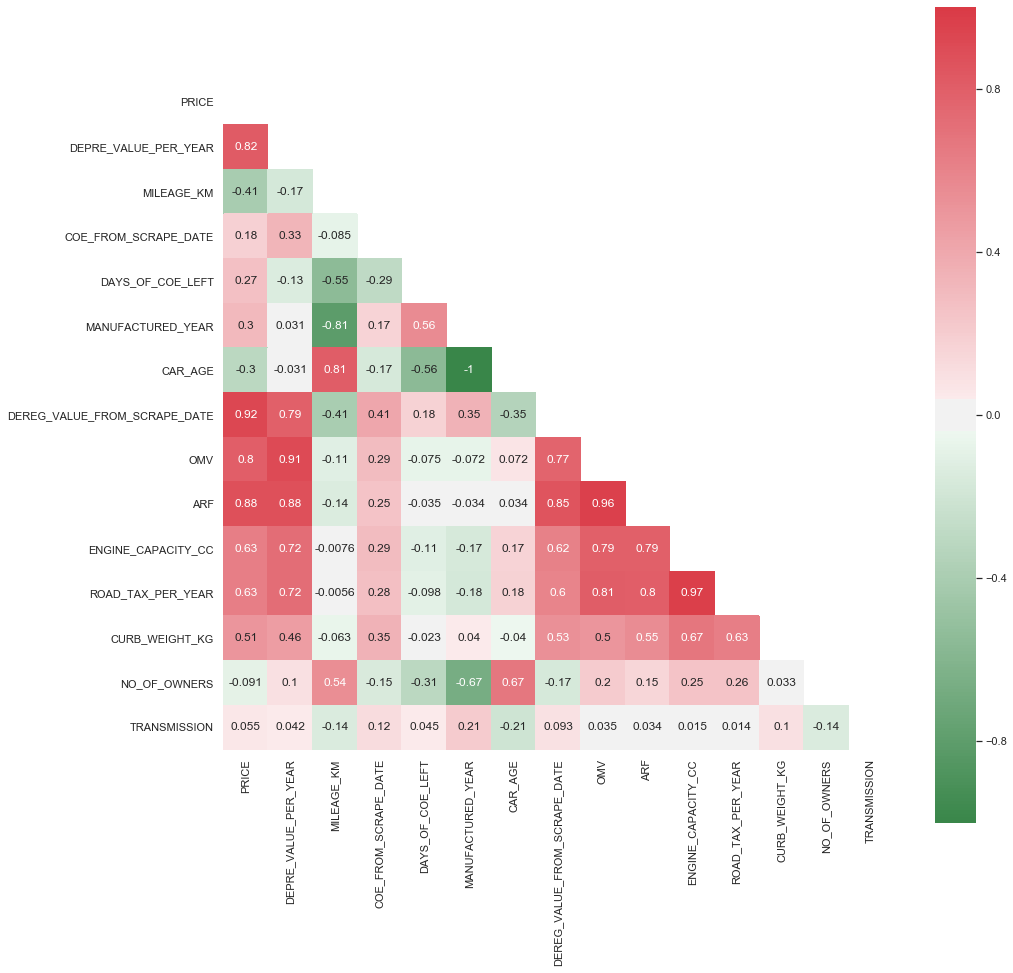

In [33]:
# Corr Matrix Heatmap Visualization

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(df_price_no_brands.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(15,15))

# Create a custom color palette
cmap = \
sns.diverging_palette(133, 10,
                      as_cmap=True)  # as_cmap returns a matplotlib colormap object rather than a list of colors
# Green = Good (low correlation), Red = Bad (high correlation) between the independent variables

# Plot the heatmap
sns.heatmap(df_price_no_brands.corr(), mask=mask, annot=True, 
            square=True, cmap=cmap , vmin=-1, vmax=1,ax=ax);

# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#### From the above Corr Matrix, we can observe that a few Independent Variables are highly correlated with each other. 
Interestingly, this makes sense due to how a few of the independent variables are calculated. Therefore, some of these features can be dropped.  
1. **OMV and ARF:** 
The Additional Registration Fee (ARF) is a tax imposed upon registration of a vehicle. It is calculated based on a percentage of the Open Market Value (OMV) of the vehicle. From the correlation matrix, they have a correlation of **0.96.** Therefore, we can just keep one of this. Therefore, **ARF** will be dropped.
   
   
2. **Engine CC and Road Tax:** 
Road tax increases as engine CC increases. Therefore, having Road Tax in it would be introducing multicolinearity into the model, since both explain the same thing anyway. From the correlation matrix, they have a correlation of **0.97**. Therefore, **road tax** column will be dropped.
   
   
3. **Manufactured Year and Car Age:** 
Obviously, manufactured year can be dropped, since Car Age is derived from year of manufacture. And since car age is more intuitive, **Manufactured Year** column will be dropped.  From the correlation matrix, they have a correlation of **-1**. 
  

  
4. **Dereg Value:**  
The deregistration value of a vehicle is amount one will get back from the government upon deregistering the vehicle for use in Singapore. It is the sum of the COE rebate and the PARF rebate.
The COE rebate is a percentage of the original COE value.
The PARF rebate is a percentage of the original OMV (Open Market Value).
Therefore, the **dereg value will be dropped**. From the corr matrix, OMV and dereg value have a correlation of **0.91.**
  
  
5. **Depreciation:** 
Annual depreciation is the amount the owner loses on the value of the vehicle per year based on the assumption that the vehicle is deregistered only at the end of its 10-yr COE life-span. The value of the car body has not been taken into account.  The formula used to derive the figure is as follows:  
Depreciation = (List Price - Minimum PARF value) ÷ remaining years of COE  
The minimum Preferential Additional Registration Fee (PARF) value is a sum of money that the vehicle owner gets for deregistering his vehicle at the end of its 10-yr COE. It is a function of the Open Market Value (OMV) or Additional Registration Fee (ARF). Commercial vehicles and cars with renewed COE have no minimum PARF value.  Depreciation and OMV have a correlation of **0.91**. **Depreciation** will be dropped.


### Section 3.1.2: Removing Independent Variables with High Correlation to each other

In [34]:
df_price_no_brands.drop(['DEPRE_VALUE_PER_YEAR','REG_DATE','MANUFACTURED_YEAR','DEREG_VALUE_FROM_SCRAPE_DATE',
                         'ARF','ROAD_TAX_PER_YEAR','VEHICLE_TYPE'],axis=1,inplace=True)
df_price_no_brands.columns

C:\Users\xianj\Anaconda3\envs\metis\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index(['PRICE', 'MILEAGE_KM', 'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT',
       'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'TRANSMISSION'],
      dtype='object')

#### Section 3.1.2.1: Re-Visualizing New Correlation Matrix (with a few features dropped)

(10.0, 0.0)

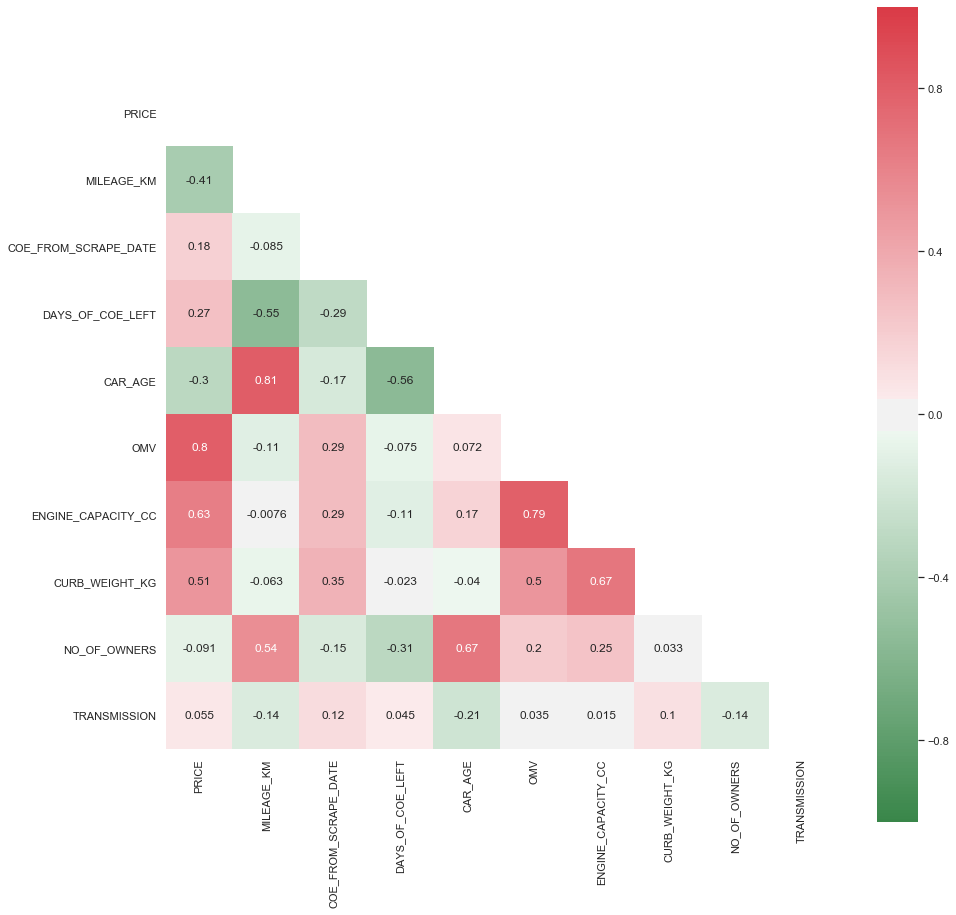

In [35]:
# Re-visualizing the correlation matrix

sns.set(style="white")

# Creating the data
data = df_price_no_brands.corr()


# Generate a mask for the upper triangle
mask = np.zeros_like(data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(15,15))

# Create a custom color palette
cmap = \
sns.diverging_palette(133, 10,
                      as_cmap=True)  # as_cmap returns a matplotlib colormap object rather than a list of colors
# Green = Good (low correlation), Red = Bad (high correlation) between the independent variables

# Plot the heatmap
sns.heatmap(data, mask=mask, annot=True, 
            square=True, cmap=cmap , vmin=-1, vmax=1,ax=ax);

# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [36]:
# Correlations of the independent variables (features) to dependent variable (target, price)
df_price_no_brands.corr()['PRICE'].sort_values(ascending=False)

PRICE                   1.000000
OMV                     0.801592
ENGINE_CAPACITY_CC      0.630484
CURB_WEIGHT_KG          0.505194
DAYS_OF_COE_LEFT        0.273379
COE_FROM_SCRAPE_DATE    0.182914
TRANSMISSION            0.054688
NO_OF_OWNERS           -0.090614
CAR_AGE                -0.304888
MILEAGE_KM             -0.409517
Name: PRICE, dtype: float64

#### Section 3.1.2.2: Pairplot after Feature Selection

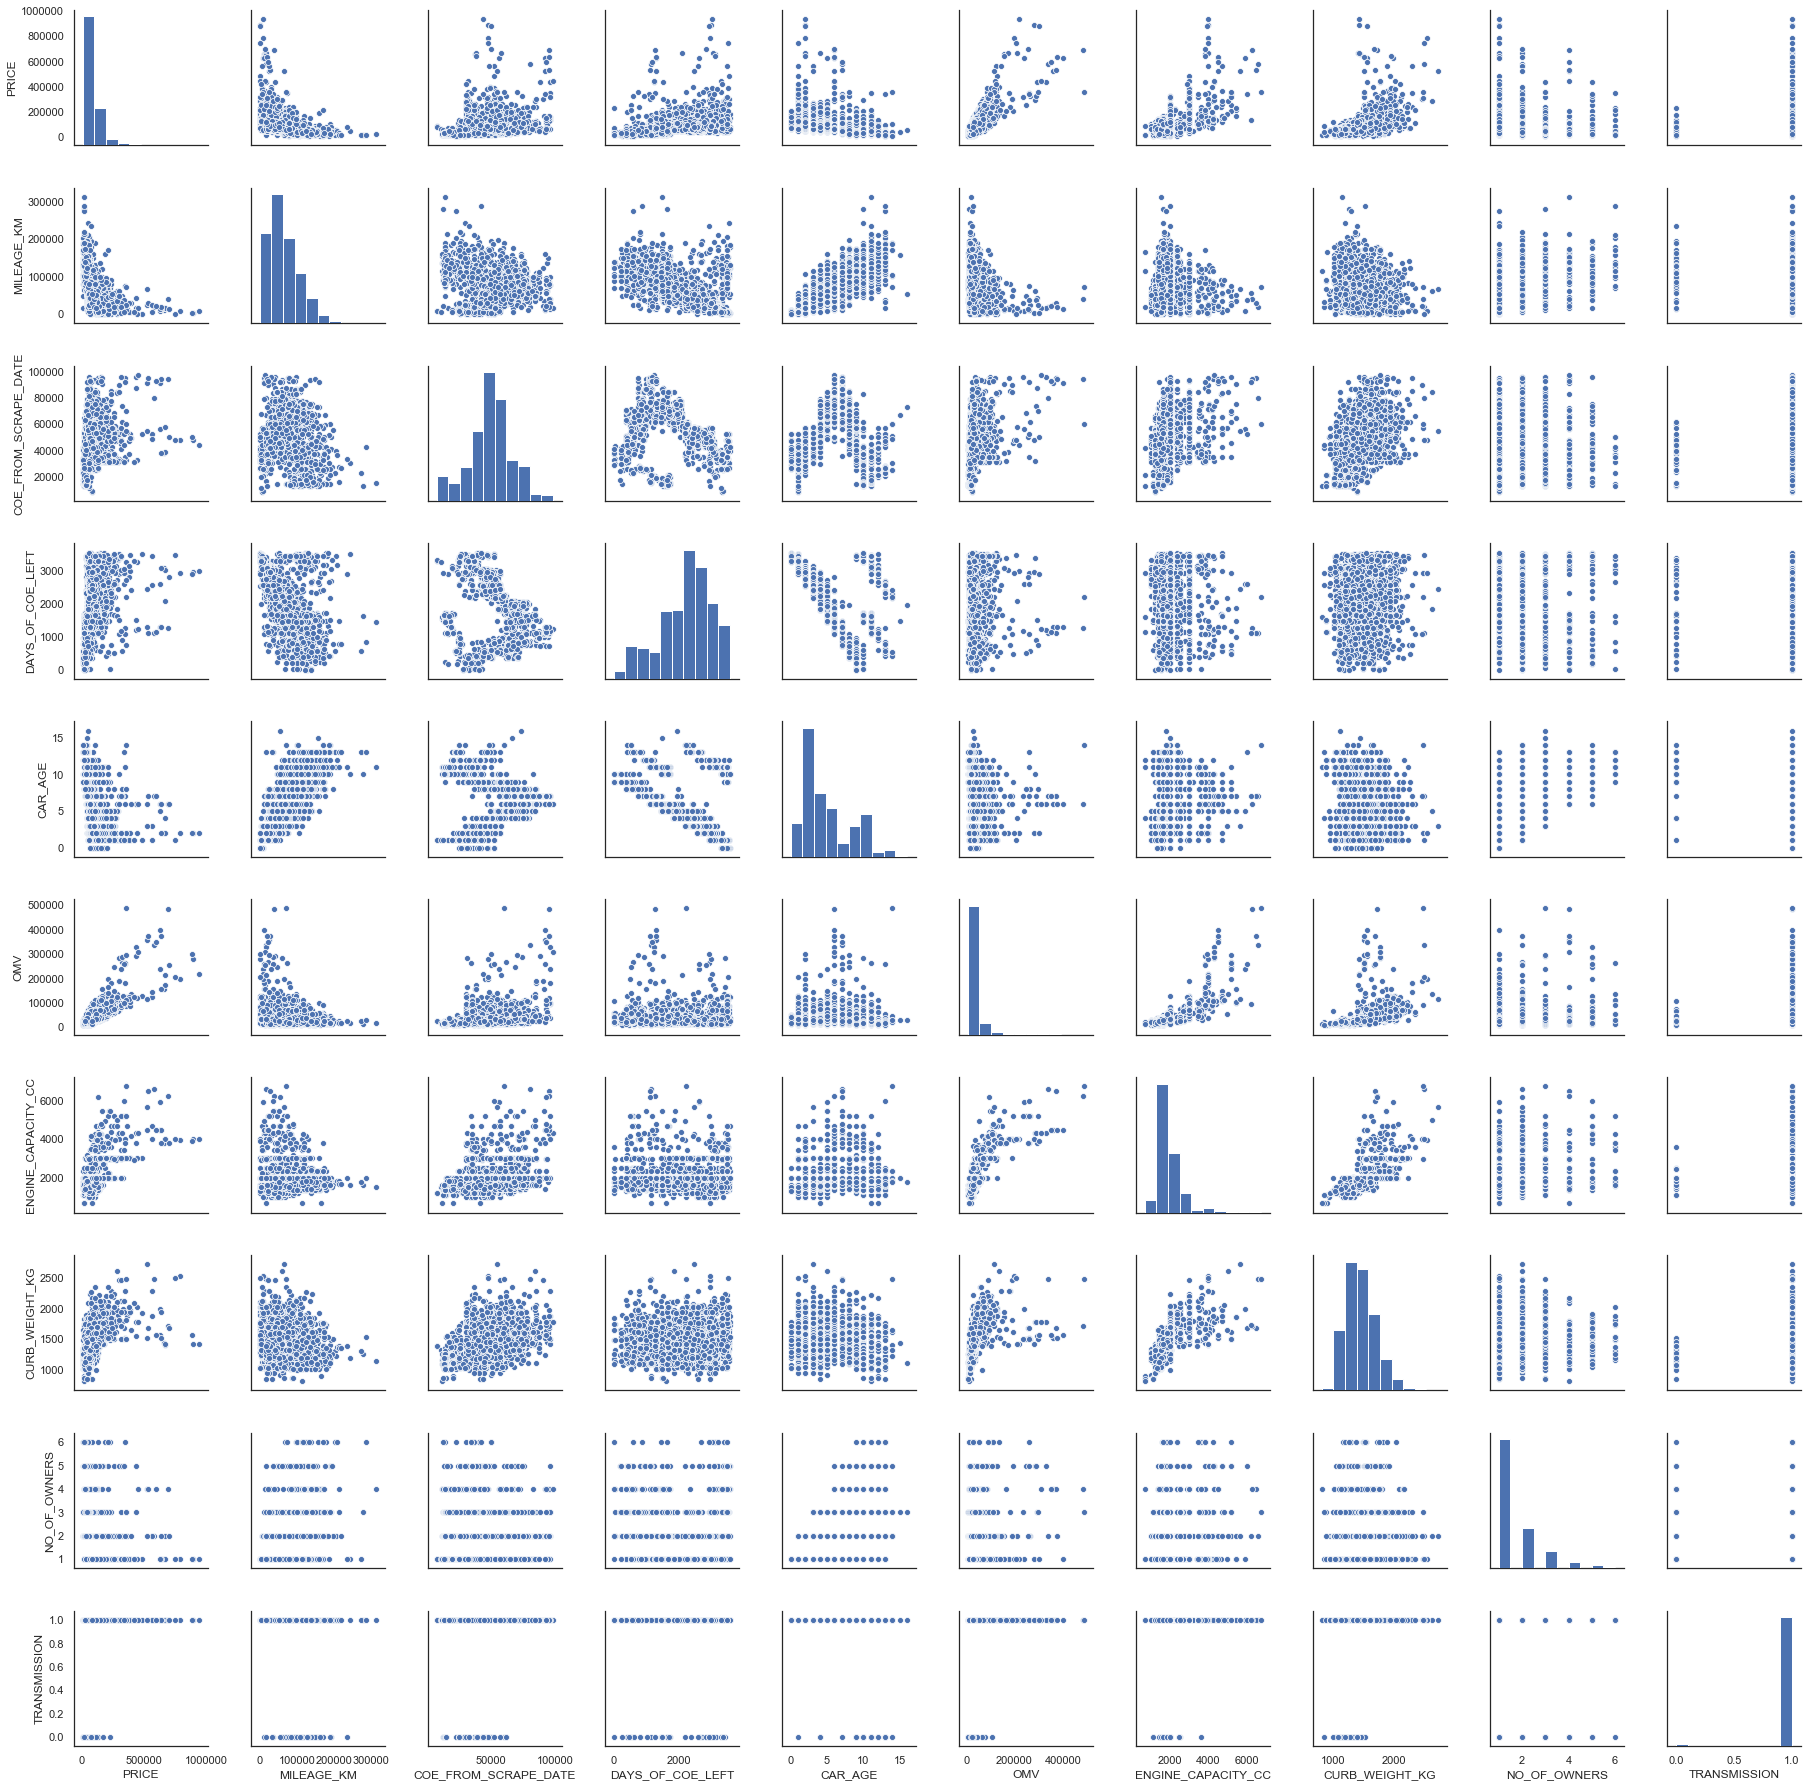

In [37]:
# Performing a pairplot to visualize the data trends of the variables

# We can see that price and mileage hold a negative linear relationship
# COE from the scrape date doesn't seem to have a very clear relatonship here
# Days of COE seems to have a slight linear r/s
# Car age doesn't seem to have a very distinct relationship here. But generally, the younger the car, the higher the price
# OMV has a clear increasing linear rs with price with price
# Engine capacity seems to also have a increasing linear r/s  with price, with a few outliers in the center
# Perhaps it's because a lot of the higher-priced cars (higher brands) are produced in that engine capacity range?
# Curb weight seems to have a linear r/s too.

sns.pairplot(df_price_no_brands);

In [38]:
df_price_no_brands.columns

Index(['PRICE', 'MILEAGE_KM', 'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT',
       'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'TRANSMISSION'],
      dtype='object')

### Section 3.2: Preliminary Model fitting to check R^2 Value and P>|t| values of Price and the leftover Independent Variables

In [39]:
# Slicing Data into Independent Variables (Features) and Dependent Variable (Target)
X = df_price_no_brands[ ['MILEAGE_KM', 'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT',
       'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'TRANSMISSION'] ].astype(float)
X = sm.add_constant(X)
y = df_price_no_brands['PRICE'].astype(float)



C:\Users\xianj\Anaconda3\envs\metis\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [40]:
X.head()

,const,MILEAGE_KM,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,CAR_AGE,OMV,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,TRANSMISSION
3,1.0,140800.0,75889.0,761.0,8.0,71379.0,2995.0,2250.0,3.0,1.0
4,1.0,117000.0,39563.0,3503.0,10.0,23465.0,1797.0,1350.0,2.0,1.0
5,1.0,126000.0,41006.0,8.0,9.0,56154.0,1796.0,1650.0,4.0,1.0
7,1.0,41000.0,78810.0,1610.0,6.0,32459.0,1598.0,1405.0,2.0,1.0
9,1.0,57784.0,61103.0,2221.0,4.0,29913.0,1395.0,1480.0,2.0,1.0


In [41]:
y.head()

3    70800.0
4    65800.0
5    45000.0
7    70800.0
9    89500.0
Name: PRICE, dtype: float64

In [42]:
# model / fit / summarize
import statsmodels.api as sm

lsm = sm.OLS(y, X)
results = lsm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     1302.
Date:                Tue, 29 Oct 2019   Prob (F-statistic):               0.00
Time:                        17:12:38   Log-Likelihood:                -30542.
No. Observations:                2584   AIC:                         6.110e+04
Df Residuals:                    2574   BIC:                         6.116e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3.484e+04   8210.482      4.244      0.000    1.87e+04    5.09e+04
MILEAGE_KM               0.0137      0.029      0.474      0.636      -0.043       0.070
COE_FROM_SCRAPE_DATE    -0.5149      0.050    -10.225      0.000      -0.614      -0.416
DAYS_OF_COE_LEFT        13.5465      1.117     12.129      0.000      11.357      15.737
CAR_AGE              -6613.2165    441.423    -14.982      0.000   -7478.797   -5747.636
OMV                      1.6947      0.030     55.901      0.000       1.635       1.754
ENGINE_CAPACITY_CC       3.7436      1.944      1.926      0.054      -0.068       7.556
CURB_WEIGHT_KG          38.2517      3.685     10.381      0.000      31.026      45.477
NO_OF_OWNERS         -5312.6178    941.160     -5.645      0.000   -7158.125   -3467.110
TRANSMISSION          -2.83e+04   5624.584     -5.031      0.000   -3.93e+04   -1.73e+04
==============================================================================
Omnibus:                     2049.653   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           458170.330
Skew:                           2.828   Prob(JB):                         0.00
Kurtosis:                      67.988   Cond. No.                     1.36e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
# We can see that the above variables are good in explaining how price is affected. THerefore, will keep these variables

### Section 3.2.1: Optimizing R^2 Value

#### Section 3.2.1.1: Checking Distributions & Pairplots of all Variables

##### Pairplot of Price vs Independent Variables (without any transformation)

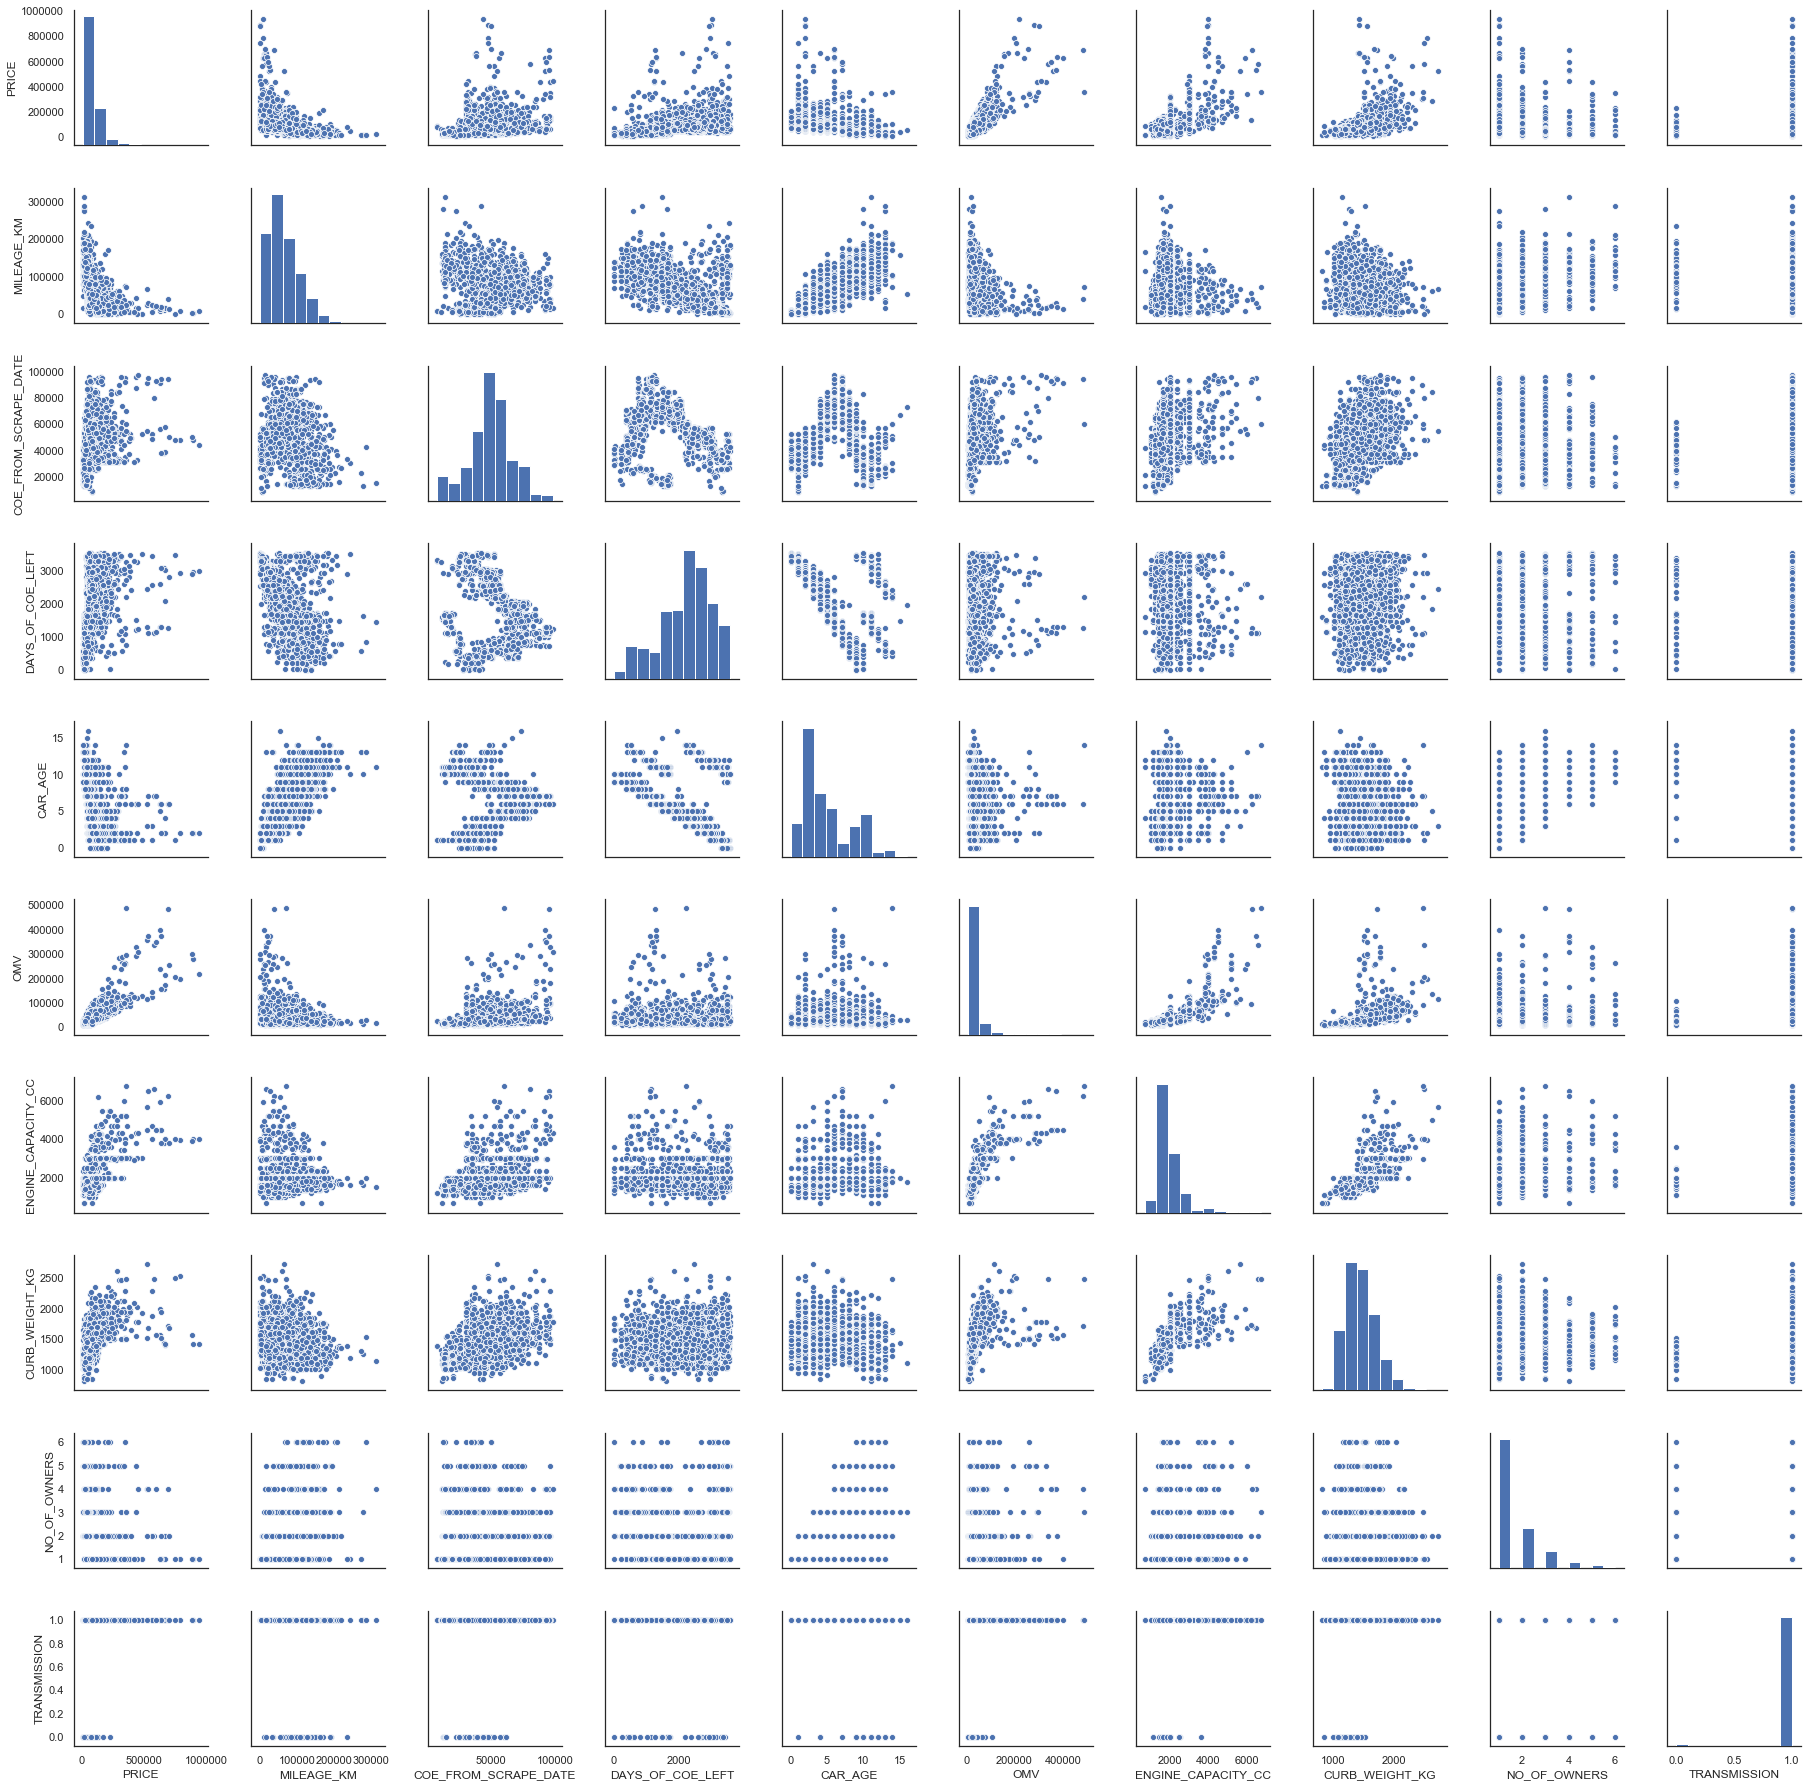

In [44]:
# Performing a pairplot to visualize the data trends of the variables

# We can see that price and mileage hold a negative linear relationship
# COE from the scrape date doesn't seem to have a very clear relatonship here
# Days of COE seems to have a slight linear r/s
# Car age doesn't seem to have a very distinct relationship here. But generally, the younger the car, the higher the price
# OMV has a clear increasing linear rs with price with price
# Engine capacity seems to also have a increasing linear r/s  with price, with a few outliers in the center
# Perhaps it's because a lot of the higher-priced cars (higher brands) are produced in that engine capacity range?
# Curb weight seems to have a linear r/s too.

sns.pairplot(df_price_no_brands);

##### Histograph of all Variables (Columns) in DataFrame

C:\Users\xianj\Anaconda3\envs\metis\lib\site-packages\ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001285E304BE0>,
      dtype=object)

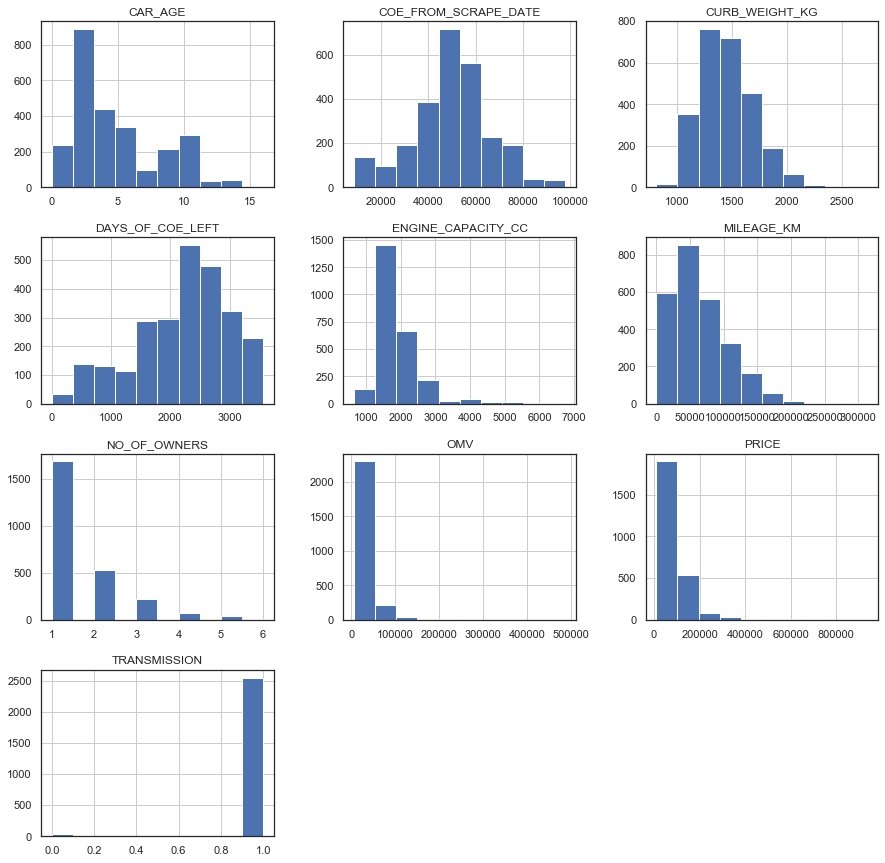

In [45]:
fig, ax = plt.subplots(figsize=(15,15))
pd.DataFrame.hist(df_price_no_brands,ax=ax)

In [46]:
# From the above graphs, it would make sense to apply log transform on the following variables to make them
# more normally distributed
# Mileage
# Engine Cap
# Price
# OMV

## Distribution of Price

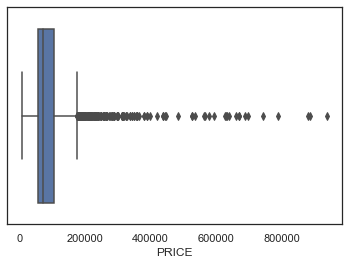

In [47]:
sns.boxplot(df_price_no_brands['PRICE'])  # 

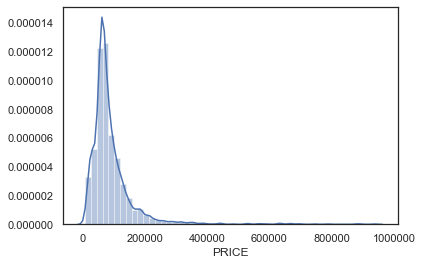

In [48]:
sns.distplot(df_price_no_brands['PRICE'])  # Your dependent variable 'must' be normally distributed

In [49]:
# We see that price is right-skewed. Therefore, we can try applying a log onto price, then visualize the data again.

### Section 3.2.1: Logging Mileage ONLY

In [50]:
# Creating a copy of the dataframe to work log on
df_price_no_brands_only_mileage_logged = df_price_no_brands.copy()

In [51]:
# Log Mileage
df_price_no_brands_only_mileage_logged["MILEAGE_LOG"] = df_price_no_brands_only_mileage_logged['MILEAGE_KM'].apply(np.log)
df_price_no_brands_only_mileage_logged

,PRICE,MILEAGE_KM,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,CAR_AGE,OMV,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,TRANSMISSION,MILEAGE_LOG
3,70800.0,140800.0,75889.0,761.0,8.0,71379.0,2995,2250.0,3.0,1,11.855096
4,65800.0,117000.0,39563.0,3503.0,10.0,23465.0,1797,1350.0,2.0,1,11.669929
5,45000.0,126000.0,41006.0,8.0,9.0,56154.0,1796,1650.0,4.0,1,11.744037
7,70800.0,41000.0,78810.0,1610.0,6.0,32459.0,1598,1405.0,2.0,1,10.621327
9,89500.0,57784.0,61103.0,2221.0,4.0,29913.0,1395,1480.0,2.0,1,10.964467
...,...,...,...,...,...,...,...,...,...,...,...
3981,103800.0,19000.0,53694.0,2434.0,3.0,27886.0,1595,1430.0,1.0,1,9.852194
3982,104500.0,47638.0,84504.0,1679.0,5.0,45977.0,3456,2030.0,2.0,1,10.771386
3983,115000.0,51500.0,67901.0,1950.0,7.0,52051.0,1796,1600.0,2.0,1,10.849337
3984,119800.0,16000.0,53300.0,2769.0,2.0,33570.0,1998,1390.0,1.0,1,9.680344


In [52]:
# Rearranging columns

df_price_no_brands_only_mileage_logged = \
df_price_no_brands_only_mileage_logged[['PRICE', 'MILEAGE_LOG', 'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT',
       'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'TRANSMISSION']]

In [53]:
df_price_no_brands_only_mileage_logged.columns

Index(['PRICE', 'MILEAGE_LOG', 'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT',
       'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'TRANSMISSION'],
      dtype='object')

In [54]:
# Slicing Data into Independent Variables (Features) and Dependent Variable (Target)
X = df_price_no_brands_only_mileage_logged[ ['MILEAGE_LOG', 'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT',
       'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'TRANSMISSION'] ].astype(float)
X = sm.add_constant(X)
y = df_price_no_brands_only_mileage_logged['PRICE'].astype(float)


# model / fit / summarize
import statsmodels.api as sm

lsm = sm.OLS(y, X)
results = lsm.fit()
results.summary()

C:\Users\xianj\Anaconda3\envs\metis\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     1338.
Date:                Tue, 29 Oct 2019   Prob (F-statistic):               0.00
Time:                        17:13:17   Log-Likelihood:                -30513.
No. Observations:                2584   AIC:                         6.105e+04
Df Residuals:                    2574   BIC:                         6.110e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.014e+05   1.18e+04      8.561      0.000    7.82e+04    1.25e+05
MILEAGE_LOG          -7085.1532    920.002     -7.701      0.000   -8889.172   -5281.134
COE_FROM_SCRAPE_DATE    -0.3993      0.052     -7.717      0.000      -0.501      -0.298
DAYS_OF_COE_LEFT        12.3075      1.099     11.203      0.000      10.153      14.462
CAR_AGE              -5061.4371    385.572    -13.127      0.000   -5817.500   -4305.374
OMV                      1.6409      0.030     54.319      0.000       1.582       1.700
ENGINE_CAPACITY_CC       3.5621      1.909      1.866      0.062      -0.182       7.306
CURB_WEIGHT_KG          38.1714      3.610     10.575      0.000      31.093      45.250
NO_OF_OWNERS         -5117.4490    923.990     -5.538      0.000   -6929.287   -3305.611
TRANSMISSION         -2.629e+04   5563.914     -4.725      0.000   -3.72e+04   -1.54e+04
==============================================================================
Omnibus:                     2109.523   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           471245.551
Skew:                           2.976   Prob(JB):                         0.00
Kurtosis:                      68.890   Cond. No.                     1.28e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Visualizing Pairplots of the distributions

sns.pairplot(df_price_no_brands_only_mileage_logged);

### Section 3.2.2: Normal Price with Logged Mileage and Squared Engine CC

In [ ]:
# Creating a copy of the dataframe to work log on
df_price_no_brands_mileage_logged_squared_engine_cap = df_price_no_brands_only_mileage_logged.copy()

In [ ]:
# Square Engine CC
df_price_no_brands_mileage_logged_squared_engine_cap["ENGINE_SQUARED"] = \
df_price_no_brands_mileage_logged_squared_engine_cap['ENGINE_CAPACITY_CC'].apply(lambda x: x**2)


In [ ]:
df_price_no_brands_mileage_logged_squared_engine_cap.columns

In [ ]:
# Rearrange columns
df_price_no_brands_mileage_logged_squared_engine_cap = \
df_price_no_brands_mileage_logged_squared_engine_cap[['PRICE', 'MILEAGE_LOG', 'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT',
       'CAR_AGE', 'OMV', 'ENGINE_SQUARED', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'TRANSMISSION']]

In [ ]:
# Slicing Data into Independent Variables (Features) and Dependent Variable (Target)
X = df_price_no_brands_mileage_logged_squared_engine_cap[ ['MILEAGE_LOG', 'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT',
       'CAR_AGE', 'OMV', 'ENGINE_SQUARED', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'TRANSMISSION'] ].astype(float)
X = sm.add_constant(X)
y = df_price_no_brands_only_mileage_logged['PRICE'].astype(float)


# model / fit / summarize
import statsmodels.api as sm

lsm = sm.OLS(y, X)
results = lsm.fit()
results.summary()

In [ ]:
# Visualizing Pairplots of the distributions

sns.pairplot(df_price_no_brands_mileage_logged_squared_engine_cap);

In [ ]:
# Viewing Corr Matrix of Price vs Independent Variables (only logged mileage and squared engine CC)

sns.set(style="white")
data = df_price_no_brands_mileage_logged_squared_engine_cap.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(15,15))

# Create a custom color palette
cmap = \
sns.diverging_palette(133, 10,
                      as_cmap=True)  # as_cmap returns a matplotlib colormap object rather than a list of colors
# Green = Good (low correlation), Red = Bad (high correlation) between the independent variables

# Plot the heatmap
sns.heatmap(data, mask=mask, annot=True, 
            square=True, cmap=cmap , vmin=-1, vmax=1,ax=ax);

# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
# Price vs Engine CC(non-squared), Price vs Engine CC(Squared);

fig, ax = plt.subplots(figsize=(15,5))

# Price vs Engine CC(non-squared)
plt.subplot(1, 2, 1)
plt.scatter(df_price_no_brands_only_mileage_logged['ENGINE_CAPACITY_CC'], 
            df_price_no_brands_only_mileage_logged['PRICE'])
plt.title("Price vs Engine CC (Non-Squared)")
plt.xlabel("Engine CC (Non-Squared)")
plt.ylabel("Price")

# Price vs Engine CC(Squared);
plt.subplot(1, 2, 2)
plt.scatter(df_price_no_brands_mileage_logged_squared_engine_cap['ENGINE_SQUARED'], 
            df_price_no_brands_mileage_logged_squared_engine_cap['PRICE'])
plt.title("Price vs Engine CC (Squared)")
plt.xlabel("Engine CC (Squared)")
plt.ylabel("Price")

### Section 3.2.3: Logged Price with Logged Mileage and Squared Engine CC

In [ ]:
df_logged_price_no_brands_mileage_logged_squared_engine_cap = df_price_no_brands_mileage_logged_squared_engine_cap.copy()

In [ ]:
# Logging Price
df_logged_price_no_brands_mileage_logged_squared_engine_cap['PRICE_LOG'] =\
df_logged_price_no_brands_mileage_logged_squared_engine_cap['PRICE'].apply(np.log)

In [ ]:
# Rearrange columns
df_logged_price_no_brands_mileage_logged_squared_engine_cap = \
df_logged_price_no_brands_mileage_logged_squared_engine_cap[['PRICE_LOG', 'MILEAGE_LOG', 'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT',
       'CAR_AGE', 'OMV', 'ENGINE_SQUARED', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'TRANSMISSION']]

In [ ]:
# Slicing Data into Independent Variables (Features) and Dependent Variable (Target)
X = df_logged_price_no_brands_mileage_logged_squared_engine_cap[ ['MILEAGE_LOG', 'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT',
       'CAR_AGE', 'OMV', 'ENGINE_SQUARED', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'TRANSMISSION'] ].astype(float)
X = sm.add_constant(X)
y = df_logged_price_no_brands_mileage_logged_squared_engine_cap['PRICE_LOG'].astype(float)


# model / fit / summarize
import statsmodels.api as sm

lsm = sm.OLS(y, X)
results = lsm.fit()
results.summary()

### Section 3.2.3: Logged Price with Logged Mileage only (no engine squared)

In [ ]:
df_logged_price_no_brands_only_mileage_logged = df_price_no_brands_only_mileage_logged.copy()

In [ ]:
# Logging Price
df_logged_price_no_brands_only_mileage_logged['PRICE'] = df_logged_price_no_brands_only_mileage_logged['PRICE'].apply(np.log)

# Renaming column
df_logged_price_no_brands_only_mileage_logged.rename(columns={'PRICE':'PRICE_LOG'},inplace=True)

In [ ]:
df_logged_price_no_brands_only_mileage_logged.columns

In [ ]:
df_logged_price_no_brands_only_mileage_logged.head()

In [ ]:
test_df = df_logged_price_no_brands_only_mileage_logged.drop(['TRANSMISSION', 'PRICE_LOG', 'CURB_WEIGHT_KG'], axis=1)

test_df['SQRT_AGE'] = np.sqrt(test_df.CAR_AGE)
test_df['LOG_OMV'] = np.log(test_df.OMV)
test_df['LOG_COE_FROM_SCRAPE_DATE'] = np.log(test_df.COE_FROM_SCRAPE_DATE)
test_df['LOG_DAYS_OF_COE_LEFT'] = np.sqrt(test_df.DAYS_OF_COE_LEFT)
test_df['LOG_ENGINE_CC'] = np.log(test_df.ENGINE_CAPACITY_CC)

test_df = test_df[['MILEAGE_LOG', 'SQRT_AGE', 'LOG_OMV', 'LOG_COE_FROM_SCRAPE_DATE', 'LOG_DAYS_OF_COE_LEFT',
                  'LOG_ENGINE_CC']]

test_y = df_logged_price_no_brands_only_mileage_logged['PRICE_LOG']

In [ ]:
test_df['SQRT_AGE'] = np.sqrt(test_df.CAR_AGE)
test_df['LOG_OMV'] = np.log(test_df.OMV)
test_df['LOG_COE_FROM_SCRAPE_DATE'] = np.log(test_df.COE_FROM_SCRAPE_DATE)
test_df['LOG_DAYS_OF_COE_LEFT'] = np.sqrt(test_df.DAYS_OF_COE_LEFT)
test_df['LOG_ENGINE_CC'] = np.log(test_df.ENGINE_CAPACITY_CC)

In [ ]:
test_df = test_df[['MILEAGE_LOG', 'SQRT_AGE', 'LOG_OMV', 'LOG_COE_FROM_SCRAPE_DATE', 'LOG_DAYS_OF_COE_LEFT',
                  'LOG_ENGINE_CC']]

In [ ]:
test_y = df_logged_price_no_brands_only_mileage_logged['PRICE_LOG']

In [ ]:
# model / fit / summarize
import statsmodels.api as sm

lsm = sm.OLS(test_y, sm.add_constant(test_df))
results = lsm.fit()
results.summary()

In [ ]:
# Slicing Data into Independent Variables (Features) and Dependent Variable (Target)
X = df_logged_price_no_brands_only_mileage_logged[['MILEAGE_LOG', 'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT',
       'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'TRANSMISSION'] ].astype(float)
X = sm.add_constant(X)
y = df_logged_price_no_brands_only_mileage_logged['PRICE_LOG'].astype(float)


# model / fit / summarize
import statsmodels.api as sm

lsm = sm.OLS(y, X)
results = lsm.fit()
results.summary()

### R^2 Summary from Linear Regression Models
Price vs Original Independent Variables:  
R^2: **0.820**  
R^2 Adjusted: **0.820**  
df_price_no_brands
  
Price vs Independent Variables (Logged Mileage and Squared Engine CC):  
R^2: **0.824**  
R^2 Adjusted: **0.824**  
df_price_no_brands_mileage_logged_squared_engine_cap
    
Logged Price vs Independent Variables (Logged Mileage and Squared Engine CC (engine squared became irrelevant):
R^2: **0.897**     
R^2 Adjusted: **0.897**   
df_logged_price_no_brands_mileage_logged_squared_engine_cap
  
Logged Price vs Independent Variables (Logged Mileage):
R^2: **0.898**     
R^2 Adjusted: **0.898**  
df_logged_price_no_brands_only_mileage_logged

## Section 3.3: Analysis of Car Brands, Vehicle Types, Brand Categorization

### 3.3.1: Further breaking down dataframe into finalized features (with log price, log mileage)

In [ ]:
df_finalized_features = df_clean2.copy()

In [ ]:
# Applying log to the desired features
df_finalized_features['PRICE'] = df_clean2['PRICE'].apply(np.log)
df_finalized_features['MILEAGE'] = df_clean2['MILEAGE_KM'].apply(np.log)


# Renaming features
df_finalized_features.rename(columns={'PRICE':'PRICE_LOG',
                                     'MILEAGE_KM':'MILEAGE_LOG'},inplace=True)

In [ ]:
df_finalized_features.columns

In [ ]:
# Rearranging Columns and removing unwanted variables
df_finalized_features = df_finalized_features[['BRAND','PRICE_LOG', 'MILEAGE_LOG', 'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT',
       'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'TRANSMISSION', 'Intercept', 'VEHICLE_TYPE[T.Luxury Sedan]',
       'VEHICLE_TYPE[T.MPV]', 'VEHICLE_TYPE[T.Mid-Sized Sedan]',
       'VEHICLE_TYPE[T.SUV]', 'VEHICLE_TYPE[T.Sports Car]',
       'VEHICLE_TYPE[T.Stationwagon]']]

In [ ]:
df_logged_price_no_brands_only_mileage_logged.columns

In [ ]:
df_finalized_features.columns

### 3.3.2: Joining Brand Dummy Variables into Main Dataframe

In [ ]:
# Creating a new DataFrame for this Brand Categorization
df_categorized_car_brands = df_finalized_features.copy()

In [ ]:
print(df_categorized_car_brands['BRAND'].value_counts())
print(len(df_categorized_car_brands['BRAND'].value_counts()))

In [ ]:
# Creating the relevant columns
df_categorized_car_brands['EXOTIC'] = 0 # Create EXOTIC column
df_categorized_car_brands["ULTRA_LUXURY"] = 0
df_categorized_car_brands["LUXURY"] = 0
df_categorized_car_brands["MID_LEVEL"] = 0
df_categorized_car_brands["ECONOMY"] = 0

In [ ]:
# Labelling Car Brands into Exotic
df_categorized_car_brands.loc[(df_clean2['BRAND'] == "Aston Martin") | 
              (df_clean2['BRAND'] == "Ferrari") |
              (df_clean2['BRAND'] == "Lamborghini") |
              (df_clean2['BRAND'] == "McLaren") |
              (df_clean2['BRAND'] == "Hummer"),
              'EXOTIC'] = 1 

# Labelling Car Brands into Ultra Luxury
df_categorized_car_brands.loc[(df_clean2['BRAND'] == "Bentley") | 
              (df_clean2['BRAND'] == "Land Rover") |
              (df_clean2['BRAND'] == "Maserati") |
              (df_clean2['BRAND'] == "Porsche") |
              (df_clean2['BRAND'] == "Rolls-Royce"), 
              "ULTRA_LUXURY"] = 1 

# Labelling Car Brands into Luxury

df_categorized_car_brands.loc[(df_clean2['BRAND'] == "Audi") | 
              (df_clean2['BRAND'] == "BMW") |
              (df_clean2['BRAND'] == "Jeep") |
              (df_clean2['BRAND'] == "Lexus") |
              (df_clean2['BRAND'] == "Lotus") |
              (df_clean2['BRAND'] == "Mercedes-Benz") |
              (df_clean2['BRAND'] == "Volvo") |
              (df_clean2['BRAND'] == "Peugeot"), 
              "LUXURY"] = 1 


# Labelling Car Brands into Mid-Level

df_categorized_car_brands.loc[(df_clean2['BRAND'] == "Infiniti") |
              (df_clean2['BRAND'] == "MINI") |
              (df_clean2['BRAND'] == "Volkswagen") |
              (df_clean2['BRAND'] == "Renault") |
              (df_clean2['BRAND'] == "Peugeot"), 
              "MID_LEVEL"] = 1 

# (df_clean2['BRAND'] == "Opel") & "Alfa Romeo" will be considered as "Others" because it is not a very common brand in Singapore

# Labelling Car Brands into Economy

df_categorized_car_brands.loc[(df_clean2['BRAND'] == "Chevrolet") | 
              (df_clean2['BRAND'] == "Citroen") |
              (df_clean2['BRAND'] == "Ford") |
              (df_clean2['BRAND'] == "Honda") |
              (df_clean2['BRAND'] == "Hyundai") |
              (df_clean2['BRAND'] == "Kia") |
              (df_clean2['BRAND'] == "Mazda") |
              (df_clean2['BRAND'] == "Mitsubishi") |
              (df_clean2['BRAND'] == "Nissan") |
              (df_clean2['BRAND'] == "Suzuki") |
              (df_clean2['BRAND'] == "Toyota"),
              "ECONOMY"] = 0

# (df_clean2['BRAND'] == "Ssangyong") will be considered as "Others" because it is not a common brand in Singapore


# The rest of the car brands not in these categories will be considered Budget
df_categorized_car_brands["BUDGET"] = 0
df_categorized_car_brands.loc[(df_clean2['BRAND'] == 'Opel') |
              (df_clean2['BRAND'] == 'Ssangyong') |
              (df_clean2['BRAND'] == 'Proton') |
              (df_clean2['BRAND'] == 'Daihatsu') |
              (df_clean2['BRAND'] == 'Fiat') |
              (df_clean2['BRAND'] == 'Alfa Romeo') |
              (df_clean2['BRAND'] == 'Skoda'), 
              'BUDGET'] = 1 

# Changing Uncommon Car brands to "Others"
df_categorized_car_brands.loc[(df_clean2['BRAND'] == 'Opel') |
                  (df_clean2['BRAND'] == 'Ssangyong') |
                  (df_clean2['BRAND'] == 'Proton') |
                  (df_clean2['BRAND'] == 'Daihatsu') |
                  (df_clean2['BRAND'] == 'Fiat') |
                  (df_clean2['BRAND'] == 'Alfa Romeo') |
                  (df_clean2['BRAND'] == 'Skoda') |
                  (df_clean2['BRAND'] == 'Hummer')|
                  (df_clean2['BRAND'] == 'Aston Martin')|
                  (df_clean2['BRAND'] == 'Lotus')|
                  (df_clean2['BRAND'] == 'Ford')|
                  (df_clean2['BRAND'] == 'Jeep'), 
                  'BRAND'] = "Others"


# Group uncommon cars into "Others". There are too many brands to work with.

In [ ]:
print(df_categorized_car_brands['BRAND'].value_counts())
print(len(df_categorized_car_brands['BRAND'].value_counts()))

##### Brand Dummy Variables Creation

In [214]:
x_brand_dummy = patsy.dmatrix('BRAND', data=df_categorized_car_brands, return_type='dataframe')
x_brand_dummy.head()

,Intercept,BRAND[T.BMW],BRAND[T.Bentley],BRAND[T.Chevrolet],BRAND[T.Citroen],BRAND[T.Ferrari],BRAND[T.Honda],BRAND[T.Hyundai],BRAND[T.Infiniti],BRAND[T.Jaguar],...,BRAND[T.Others],BRAND[T.Peugeot],BRAND[T.Porsche],BRAND[T.Renault],BRAND[T.Rolls-Royce],BRAND[T.Subaru],BRAND[T.Suzuki],BRAND[T.Toyota],BRAND[T.Volkswagen],BRAND[T.Volvo]
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [215]:
df_categorized_car_brands.drop('Intercept',axis=1,inplace=True)# Drop intercept because already have intercept from previous vehicle type
df_categorized_car_brands = df_categorized_car_brands.join(x_brand_dummy)
df_categorized_car_brands

,BRAND,PRICE_LOG,MILEAGE_LOG,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,CAR_AGE,OMV,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,...,BRAND[T.Others],BRAND[T.Peugeot],BRAND[T.Porsche],BRAND[T.Renault],BRAND[T.Rolls-Royce],BRAND[T.Subaru],BRAND[T.Suzuki],BRAND[T.Toyota],BRAND[T.Volkswagen],BRAND[T.Volvo]
3,Audi,11.167614,140800.0,75889.0,761.0,8.0,71379.0,2995,2250.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Toyota,11.094375,117000.0,39563.0,3503.0,10.0,23465.0,1797,1350.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,Mercedes-Benz,10.714418,126000.0,41006.0,8.0,9.0,56154.0,1796,1650.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,BMW,11.167614,41000.0,78810.0,1610.0,6.0,32459.0,1598,1405.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Audi,11.401994,57784.0,61103.0,2221.0,4.0,29913.0,1395,1480.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3981,Mercedes-Benz,11.550221,19000.0,53694.0,2434.0,3.0,27886.0,1595,1430.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3982,Toyota,11.556942,47638.0,84504.0,1679.0,5.0,45977.0,3456,2030.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3983,Mercedes-Benz,11.652687,51500.0,67901.0,1950.0,7.0,52051.0,1796,1600.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3984,MINI,11.693579,16000.0,53300.0,2769.0,2.0,33570.0,1998,1390.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3.3.4 : Only Brand Segregation

In [224]:
df_categorized_car_brands.columns

Index(['BRAND', 'PRICE_LOG', 'MILEAGE_LOG', 'COE_FROM_SCRAPE_DATE',
       'DAYS_OF_COE_LEFT', 'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC',
       'CURB_WEIGHT_KG', 'NO_OF_OWNERS', 'TRANSMISSION',
       'VEHICLE_TYPE[T.Luxury Sedan]', 'VEHICLE_TYPE[T.MPV]',
       'VEHICLE_TYPE[T.Mid-Sized Sedan]', 'VEHICLE_TYPE[T.SUV]',
       'VEHICLE_TYPE[T.Sports Car]', 'VEHICLE_TYPE[T.Stationwagon]', 'EXOTIC',
       'ULTRA_LUXURY', 'LUXURY', 'MID_LEVEL', 'ECONOMY', 'BUDGET', 'Intercept',
       'BRAND[T.BMW]', 'BRAND[T.Bentley]', 'BRAND[T.Chevrolet]',
       'BRAND[T.Citroen]', 'BRAND[T.Ferrari]', 'BRAND[T.Honda]',
       'BRAND[T.Hyundai]', 'BRAND[T.Infiniti]', 'BRAND[T.Jaguar]',
       'BRAND[T.Kia]', 'BRAND[T.Lamborghini]', 'BRAND[T.Land Rover]',
       'BRAND[T.Lexus]', 'BRAND[T.MINI]', 'BRAND[T.Maserati]',
       'BRAND[T.Mazda]', 'BRAND[T.McLaren]', 'BRAND[T.Mercedes-Benz]',
       'BRAND[T.Mitsubishi]', 'BRAND[T.Nissan]', 'BRAND[T.Others]',
       'BRAND[T.Peugeot]', 'BRAND[T.Porsche]', 'BRAND

In [ ]:
df_categorized_car_brands[['MILEAGE_LOG', 'COE_FROM_SCRAPE_DATE',
       'DAYS_OF_COE_LEFT', 'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC',
       'CURB_WEIGHT_KG', 'NO_OF_OWNERS', 'TRANSMISSION', 'EXOTIC', 'ULTRA_LUXURY', 'LUXURY',
       'MID_LEVEL', 'ECONOMY', 'BUDGET']]

In [328]:
# Finding out new R^2 from log transformations of Log Price and Log Independent Variables (except Mileage)

# Slicing Variables
X = df_categorized_car_brands[['MILEAGE_LOG', 'COE_FROM_SCRAPE_DATE',
       'DAYS_OF_COE_LEFT', 'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC',
       'CURB_WEIGHT_KG', 'NO_OF_OWNERS', 'TRANSMISSION', 'EXOTIC', 'ULTRA_LUXURY', 'LUXURY',
       'MID_LEVEL', 'ECONOMY', 'BUDGET']]
X = sm.add_constant(X)
y = df_categorized_car_brands['PRICE_LOG']

# Initially my coefficients were difficult to interpret. 
# Therefore I transformed it using log for better explanation purposes

# model / fit / summarize
import statsmodels.api as sm

lsm = sm.OLS(y, X)
results = lsm.fit()
results.summary()

C:\Users\xianj\Anaconda3\envs\metis\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PRICE_LOG   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     2004.
Date:                Tue, 29 Oct 2019   Prob (F-statistic):               0.00
Time:                        16:36:51   Log-Likelihood:                 918.57
No. Observations:                2584   AIC:                            -1805.
Df Residuals:                    2568   BIC:                            -1711.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.8202      0.048    205.115      0.000       9.726       9.914
MILEAGE_LOG          -7.585e-07    1.5e-07     -5.064      0.000   -1.05e-06   -4.65e-07
COE_FROM_SCRAPE_DATE    4.5e-06   2.64e-07     17.074      0.000    3.98e-06    5.02e-06
DAYS_OF_COE_LEFT         0.0003   5.79e-06     48.818      0.000       0.000       0.000
CAR_AGE                 -0.0578      0.002    -25.261      0.000      -0.062      -0.053
OMV                   6.379e-06    2.3e-07     27.736      0.000    5.93e-06    6.83e-06
ENGINE_CAPACITY_CC       0.0001   1.06e-05     11.615      0.000       0.000       0.000
CURB_WEIGHT_KG           0.0004   2.13e-05     19.299      0.000       0.000       0.000
NO_OF_OWNERS            -0.0118      0.005     -2.405      0.016      -0.021      -0.002
TRANSMISSION            -0.1588      0.029     -5.459      0.000      -0.216      -0.102
EXOTIC                  -0.1034      0.062     -1.663      0.096      -0.225       0.019
ULTRA_LUXURY             0.2040      0.028      7.167      0.000       0.148       0.260
LUXURY                   0.1519      0.019      8.031      0.000       0.115       0.189
MID_LEVEL                0.0208      0.021      0.980      0.327      -0.021       0.062
ECONOMY                 -0.0723      0.019     -3.810      0.000      -0.110      -0.035
BUDGET                  -0.0702      0.052     -1.339      0.181      -0.173       0.033
==============================================================================
Omnibus:                      582.878   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12733.228
Skew:                          -0.512   Prob(JB):                         0.00
Kurtosis:                      13.827   Cond. No.                     1.96e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### R^2 Summary from Linear Regression Models
Price vs Original Independent Variables:  
R^2: **0.820**  
R^2 Adjusted: **0.820**  
df_price_no_brands
  
Price vs Independent Variables (Logged Mileage and Squared Engine CC):  
R^2: **0.824**  
R^2 Adjusted: **0.824**  
df_price_no_brands_mileage_logged_squared_engine_cap
    
Logged Price vs Independent Variables (Logged Mileage and Squared Engine CC (engine squared became irrelevant):
R^2: **0.897**     
R^2 Adjusted: **0.897**   
df_logged_price_no_brands_mileage_logged_squared_engine_cap
  
Logged Price vs Independent Variables (Logged Mileage):
R^2: **0.898**     
R^2 Adjusted: **0.898**  
df_logged_price_no_brands_only_mileage_logged  
  
Logged Price vs Independent Variables (Logged Mileage) + Categorized Car Brands:
R^2: **0.921**     
R^2 Adjusted: **0.921**  
df_categorized_car_brands

## Section 4.2: Cross-Validation Using Models other than LR

### Section 4.2.1 : Using LassoCV to find best Alpha Value for L1 Regularization

In [231]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [232]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold  #Kfold will allow you to do cross validation

X = df_categorized_car_brands[['MILEAGE_LOG', 'COE_FROM_SCRAPE_DATE',
       'DAYS_OF_COE_LEFT', 'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC',
       'CURB_WEIGHT_KG', 'NO_OF_OWNERS', 'TRANSMISSION', 'EXOTIC', 'ULTRA_LUXURY', 'LUXURY',
       'MID_LEVEL', 'ECONOMY', 'BUDGET']]

y = df_categorized_car_brands['PRICE_LOG']

# hold out 20% of the data for final testing

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.2, random_state=20)

In [233]:

## Scale the data (a MUST if you're doing regularization)
std = StandardScaler()
std.fit(X_train.values)

## Scale the Predictors on both the train/validation (the whole 80%) and test set (the whole 20%)
X_train_scaled = std.transform(X_train.values)
X_val_scaled = std.transform(X_val.values)

# LassoCV does 2 things for you. It trains your model, and it also chooses the best lambda/alpha for you.  
# But of course, you have to feed it a list of lambdas to try.

# The best part about LambdaCV is that it does all 3 for you:
# Fit
# Finding best lambda
# Doing Cross-Validation

from sklearn.model_selection import KFold   #Kfold will allow you to do cross validation

# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-3,3,200) # Defining a vector of lambdas (alpha) to try from
kf = KFold(n_splits=5, shuffle=True, random_state = 1000)  # Creating a partitioned randomized-state data

lasso_model = LassoCV(alphas = alphavec, cv=kf)  # If you want to use Ridge, use RidgeCV
lasso_model.fit(X_train_scaled, y_train)

# This is the best alpha value it found - not far from the value
# selected using simple validation
lasso_model.alpha_

0.0032550885998350564

In [234]:
# These are the (standardized) coefficients found when it refit using that best alpha
list(zip(X_train.columns, lasso_model.coef_))

[('MILEAGE_LOG', -0.03689110265680966),
 ('COE_FROM_SCRAPE_DATE', 0.06481376606248887),
 ('DAYS_OF_COE_LEFT', 0.21812096373130438),
 ('CAR_AGE', -0.17695678924170913),
 ('OMV', 0.26330195415653385),
 ('ENGINE_CAPACITY_CC', 0.06969015644788246),
 ('CURB_WEIGHT_KG', 0.10542852759678789),
 ('NO_OF_OWNERS', -0.010508119632416752),
 ('TRANSMISSION', -0.02332597379628407),
 ('EXOTIC', -0.02889039617933594),
 ('ULTRA_LUXURY', 0.0328461338537053),
 ('LUXURY', 0.05758408083998944),
 ('MID_LEVEL', 0.0),
 ('ECONOMY', -0.04142286228425683),
 ('BUDGET', -0.0)]

In [238]:
def RMSE(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

# Make predictions on the test set using the new model 
# (the model is already using the best alpha. It is a LassoCV initialization)
val_set_pred = lasso_model.predict(X_val_scaled)

# Find the MAE and R^2 on the test set using this model
print(f"LassoCV Best Lambda (alpha): {lasso_model.alpha_}")
print(f"LassoCV RMSE: {RMSE(y_val, val_set_pred)}")
print(f"LassoCV R^2 Score: {r2_score(y_val, val_set_pred)}")

LassoCV Best Lambda (alpha): 0.0032550885998350564
LassoCV RMSE: 0.2060456832969135
LassoCV R^2 Score: 0.8908070012251001


### Section 4.2.2: Using RidgeCV to find best Alpha Value for L2 Regularization

In [239]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold  #Kfold will allow you to do cross validation

X = df_categorized_car_brands[['MILEAGE_LOG', 'COE_FROM_SCRAPE_DATE',
       'DAYS_OF_COE_LEFT', 'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC',
       'CURB_WEIGHT_KG', 'NO_OF_OWNERS', 'TRANSMISSION', 'EXOTIC', 'ULTRA_LUXURY', 'LUXURY',
       'MID_LEVEL', 'ECONOMY', 'BUDGET']]

y = df_categorized_car_brands['PRICE_LOG']

# hold out 20% of the data for final testing

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.2, random_state=20)

In [240]:
# Use RidgeCV to find the optimal ALPHA value for L2 regularization

## Scale the data (a MUST if you're doing regularization)
std = StandardScaler()
std.fit(X_train.values)

# Scale the Predictors on both the train and validation set (for RidgeCV)
X_train_scaled = std.transform(X_train.values)
X_val_scaled = std.transform(X_val.values)

# Run the cross-validation, find the best alpha, refit the model on all the data with that alpha (RidgeCV does this for you)
alphavec = 10 ** np.linspace(-3,3,200) # alpha varies from 0.001 to 1000
kf = KFold(n_splits=5, shuffle=True, random_state=1000)

ridge_model = RidgeCV(alphas=alphavec, cv=kf)
ridge_model.fit(X_train_scaled, y_train)  # Fit your scaled train input and your y train values

# This is the best alpha value found
ridge_model.alpha_

21.96385372416547

In [241]:
# display all coefficients in the model with optimal alpha
list(zip(X_train.columns, ridge_model.coef_))

[('MILEAGE_LOG', -0.042394292256485146),
 ('COE_FROM_SCRAPE_DATE', 0.06678341343292019),
 ('DAYS_OF_COE_LEFT', 0.21841575383069542),
 ('CAR_AGE', -0.1716508933134741),
 ('OMV', 0.2577164568452119),
 ('ENGINE_CAPACITY_CC', 0.07655344165346685),
 ('CURB_WEIGHT_KG', 0.10350971130241264),
 ('NO_OF_OWNERS', -0.014649744302495105),
 ('TRANSMISSION', -0.027096576516797567),
 ('EXOTIC', -0.029496516213225302),
 ('ULTRA_LUXURY', 0.037397703001438846),
 ('LUXURY', 0.06504754305742101),
 ('MID_LEVEL', 0.004835938074657496),
 ('ECONOMY', -0.037328614642465174),
 ('BUDGET', -0.0003095576440478138)]

In [242]:
def RMSE(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

# Make predictions on the test set using the new model and save it into a variable
val_set_pred = lasso_model.predict(X_val_scaled)


# Find the MAE and R^2 on the test set using this model
print(f"Best Lambda (alpha) RidgeCV: {ridge_model.alpha_}")
print(f"RidgeCV MAE: {RMSE(y_val, val_set_pred)}")
print(f"RidgeCV R^2 Score: {r2_score(y_val, val_set_pred)}")

Best Lambda (alpha) RidgeCV: 21.96385372416547
RidgeCV MAE: 0.2060456832969135
RidgeCV R^2 Score: 0.8908070012251001


### Section 4.2.3: Using ElasticnetCV to find best Alpha Value 

In [244]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold  #Kfold will allow you to do cross validation

X = df_categorized_car_brands[['MILEAGE_LOG', 'COE_FROM_SCRAPE_DATE',
       'DAYS_OF_COE_LEFT', 'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC',
       'CURB_WEIGHT_KG', 'NO_OF_OWNERS', 'TRANSMISSION', 'EXOTIC', 'ULTRA_LUXURY', 'LUXURY',
       'MID_LEVEL', 'ECONOMY', 'BUDGET']]

y = df_categorized_car_brands['PRICE_LOG']

# hold out 20% of the data for final testing

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.2, random_state=20)

In [245]:
# Using ElasticNetCV to find the optimal ALPHA value
# Scale the data as before (scaling is a must for regularization)
std = StandardScaler()
std.fit(X_train.values) # (60% of the data)

# Scale the Predictors on both the train and validation set
X_train_scaled = std.transform(X_train.values)
X_val_scalred = std.transform(X_val.values)

# Run the cross-validation, find the best alpha, refit the model and all the data using that alpha (ElasticNetCV does this for you)
alphavec = 10 ** np.linspace(-3,3,200)  # alpha varies from 0.001 to 1000
kf = KFold(n_splits=5, shuffle=True, random_state=1000)

elasticnet_model = ElasticNetCV(alphas = alphavec, cv=kf)
elasticnet_model.fit(X_train_scaled, y_train)  # Fitting standardscaled input and true y values into model to train it

elasticnet_model.alpha_

0.006080224261649421

In [246]:
# display all coefficients in the model with optimal alpha
list(zip(X_train.columns, elasticnet_model.coef_))

[('MILEAGE_LOG', -0.03837190175452888),
 ('COE_FROM_SCRAPE_DATE', 0.06478560224721128),
 ('DAYS_OF_COE_LEFT', 0.2174561074427263),
 ('CAR_AGE', -0.17563704481132553),
 ('OMV', 0.25958740349987547),
 ('ENGINE_CAPACITY_CC', 0.07126100701743189),
 ('CURB_WEIGHT_KG', 0.10532508487078017),
 ('NO_OF_OWNERS', -0.010911873656657658),
 ('TRANSMISSION', -0.023449556858663432),
 ('EXOTIC', -0.027156002700613833),
 ('ULTRA_LUXURY', 0.03365270850201948),
 ('LUXURY', 0.058052096561623016),
 ('MID_LEVEL', 0.0),
 ('ECONOMY', -0.0418436736583076),
 ('BUDGET', -0.0)]

In [247]:
def RMSE(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

# Use this model to do prediction on a validation data set
val_set_pred = elasticnet_model.predict(X_val_scaled)

# Find the MAE and R^2 on the test set using this model
print(f'Best Lambda (Alpha) ElasticNetCV: {elasticnet_model.alpha_}')
print(f'ElasticNetCV RMSE: {RMSE(y_val, val_set_pred)}')  # mae is a defined function above
print(f'ElasticNetCV R^2 Score: {r2_score(y_val, val_set_pred)}')  # r2_score is an imported module

Best Lambda (Alpha) ElasticNetCV: 0.006080224261649421
ElasticNetCV RMSE: 0.20546000914492651
ElasticNetCV R^2 Score: 0.8914268698533193


### Section 4.2.3: Summary from the above Train-Validation Sets

LassoCV Best Lambda (alpha): 0.0032550885998350564  
LassoCV RMSE: 0.2060456832969135  
LassoCV R^2 Score: 0.8908070012251001  
  
Best Lambda (alpha) RidgeCV: 21.96385372416547  
RidgeCV MAE: 0.2060456832969135  
RidgeCV R^2 Score: 0.8908070012251001  
  
Best Lambda (Alpha) ElasticNetCV: 0.006080224261649421  
ElasticNetCV RMSE: 0.20546000914492651    
ElasticNetCV R^2 Score: 0.8914268698533193  

### Section 4.2.4: Picking Model with the best R^2 score and RMSE (Train/Validation Only)

In [251]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold  #Kfold will allow you to do cross validation

X = df_categorized_car_brands[['MILEAGE_LOG', 'COE_FROM_SCRAPE_DATE',
       'DAYS_OF_COE_LEFT', 'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC',
       'CURB_WEIGHT_KG', 'NO_OF_OWNERS', 'TRANSMISSION', 'EXOTIC', 'ULTRA_LUXURY', 'LUXURY',
       'MID_LEVEL', 'ECONOMY', 'BUDGET']]

y = df_categorized_car_brands['PRICE_LOG']

# Create 80% of train data. The code below will automate the cross-validation
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

In [252]:
## cross validation using KFold (on the 100% dataset, without manually splitting)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

def RMSE(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))


#Feature transform/scaling so that we can run our ridge/lasso/elasticnet model 
scaler = StandardScaler()
X_train_val_scaled = scaler.fit_transform(X_train_val.values)

#Feature transform/scaling so that we can run our poly model 
poly = PolynomialFeatures(degree=2) 
X_train_val_poly = poly.fit_transform(X_train_val.values)

kf = KFold(n_splits=5, shuffle=True, random_state = 1000)

lm = LinearRegression()
cvs_lm = cross_val_score(lm, X_train_val, y_train_val, cv=kf, scoring='r2')
print("Linear Regression Cross Val Score: {}".format(cvs_lm))
# print(f'ElasticNetCV RMSE: {round(RMSE(y_val, val_set_pred),3)}')
print('Linear regression cv R^2:', round(np.mean(cvs_lm),3), '+-', round(np.std(cvs_lm),3),'\n' )


lm_ridge = Ridge(alpha=21.96385372416547 )
cvs_ridge = cross_val_score(lm_ridge, X_train_val_scaled, y_train_val, cv=kf, scoring='r2')
print("Ridge Cross Val Score: {}".format(cvs_ridge))
# print(f'ElasticNetCV RMSE: {round(RMSE(y_val, val_set_pred),3)}')
print('Ridge regression cv R^2:', round(np.mean(cvs_ridge),3), '+-', round(np.std(cvs_ridge),3),'\n' )



lm_lasso = Lasso(alpha=0.0032550885998350564)
cvs_lasso = cross_val_score(lm_lasso, X_train_val_scaled, y_train_val, cv=kf, scoring='r2')
print("Lasso Cross Val Score: {}".format(cvs_lasso))
# print(f'ElasticNetCV RMSE: {round(RMSE(y_val, val_set_pred),3)}')
print('Lasso regression cv R^2:', round(np.mean(cvs_lasso),3), '+-', round(np.std(cvs_lasso),3),'\n' )


lm_elasticnet = ElasticNet(alpha=0.006080224261649421 )
cvs_elasticnet = cross_val_score(lm_elasticnet, X_train_val_scaled, y_train_val, cv=kf, scoring='r2')
print("Elastic Net Cross Val Score: {}".format(cvs_elasticnet))
# print(f'ElasticNetCV RMSE: {round(RMSE(y_val, val_set_pred),3)}')
print('ElasticNet regression cv R^2:', round(np.mean(cvs_elasticnet),3), '+-', round(np.std(cvs_elasticnet),3),'\n' )


lm_poly = LinearRegression()
cvs_poly = cross_val_score(lm_poly, X_train_val_poly, y_train_val, cv=kf, scoring='r2')
print("Poly Regression Cross Val Score: {}".format(cvs_poly))
# print(f'ElasticNetCV RMSE: {round(RMSE(y_val, val_set_pred),3)}')
print('Degree 2 polynomial Regression cv R^2:', round(np.mean(cvs_poly),3), '+-', round(np.std(cvs_poly),3) )

Linear Regression Cross Val Score: [0.92144556 0.90568859 0.92646982 0.92521773 0.88399617]
Linear regression cv R^2: 0.913 +- 0.016 

Ridge Cross Val Score: [0.92031216 0.90489814 0.92713366 0.92451871 0.88843608]
Ridge regression cv R^2: 0.913 +- 0.015 

Lasso Cross Val Score: [0.91978311 0.90517028 0.92667215 0.92642814 0.88811783]
Lasso regression cv R^2: 0.913 +- 0.015 

Elastic Net Cross Val Score: [0.91973094 0.90508019 0.92684403 0.92631566 0.88885101]
ElasticNet regression cv R^2: 0.913 +- 0.015 

Poly Regression Cross Val Score: [0.63927277 0.83611875 0.89198478 0.95281637 0.82403863]
Degree 2 polynomial Regression cv R^2: 0.829 +- 0.105


In [253]:
# From the code above, it seems like Linear Regression provides similar results as compared to the rest.
# Therefore, will choose to use linear regression for it's simplicity and ease of use

# Section 5: Model Testing (On whole DataSet)

## Section 5.1: Training Model on 80% DataSet

In [292]:
df_categorized_car_brands.columns

Index(['BRAND', 'PRICE_LOG', 'MILEAGE_LOG', 'COE_FROM_SCRAPE_DATE',
       'DAYS_OF_COE_LEFT', 'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC',
       'CURB_WEIGHT_KG', 'NO_OF_OWNERS', 'TRANSMISSION',
       'VEHICLE_TYPE[T.Luxury Sedan]', 'VEHICLE_TYPE[T.MPV]',
       'VEHICLE_TYPE[T.Mid-Sized Sedan]', 'VEHICLE_TYPE[T.SUV]',
       'VEHICLE_TYPE[T.Sports Car]', 'VEHICLE_TYPE[T.Stationwagon]', 'EXOTIC',
       'ULTRA_LUXURY', 'LUXURY', 'MID_LEVEL', 'ECONOMY', 'BUDGET', 'Intercept',
       'BRAND[T.BMW]', 'BRAND[T.Bentley]', 'BRAND[T.Chevrolet]',
       'BRAND[T.Citroen]', 'BRAND[T.Ferrari]', 'BRAND[T.Honda]',
       'BRAND[T.Hyundai]', 'BRAND[T.Infiniti]', 'BRAND[T.Jaguar]',
       'BRAND[T.Kia]', 'BRAND[T.Lamborghini]', 'BRAND[T.Land Rover]',
       'BRAND[T.Lexus]', 'BRAND[T.MINI]', 'BRAND[T.Maserati]',
       'BRAND[T.Mazda]', 'BRAND[T.McLaren]', 'BRAND[T.Mercedes-Benz]',
       'BRAND[T.Mitsubishi]', 'BRAND[T.Nissan]', 'BRAND[T.Others]',
       'BRAND[T.Peugeot]', 'BRAND[T.Porsche]', 'BRAND

In [293]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold  #Kfold will allow you to do cross validation

X = df_categorized_car_brands[['MILEAGE_LOG', 'COE_FROM_SCRAPE_DATE',
       'DAYS_OF_COE_LEFT', 'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC',
       'CURB_WEIGHT_KG', 'NO_OF_OWNERS', 'TRANSMISSION', 'Intercept', 'EXOTIC', 'ULTRA_LUXURY', 'LUXURY',
       'MID_LEVEL', 'ECONOMY', 'BUDGET']]

y = df_categorized_car_brands['PRICE_LOG']

# Create 80% of train data. The code below will automate the cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=20)

In [303]:
# model / fit / summarize
import statsmodels.api as sm

lm_model = LinearRegression()
lm_model = sm.OLS(y_train, X_train)  # no need sm.add_constant because there's already an intercept
results = lm_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PRICE_LOG   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     1622.
Date:                Tue, 29 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:58:37   Log-Likelihood:                 720.99
No. Observations:                2067   AIC:                            -1410.
Df Residuals:                    2051   BIC:                            -1320.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
MILEAGE_LOG          -5.804e-07   1.71e-07     -3.400      0.001   -9.15e-07   -2.46e-07
COE_FROM_SCRAPE_DATE  4.404e-06   2.98e-07     14.778      0.000    3.82e-06    4.99e-06
DAYS_OF_COE_LEFT         0.0003   6.54e-06     43.856      0.000       0.000       0.000
CAR_AGE                 -0.0585      0.003    -22.467      0.000      -0.064      -0.053
OMV                   5.968e-06   2.48e-07     24.021      0.000    5.48e-06    6.46e-06
ENGINE_CAPACITY_CC       0.0001   1.16e-05     10.554      0.000    9.97e-05       0.000
CURB_WEIGHT_KG           0.0004   2.37e-05     18.887      0.000       0.000       0.000
NO_OF_OWNERS            -0.0146      0.006     -2.650      0.008      -0.025      -0.004
TRANSMISSION            -0.1277      0.033     -3.905      0.000      -0.192      -0.064
Intercept                9.7336      0.055    178.225      0.000       9.627       9.841
EXOTIC                   0.0336      0.067      0.504      0.614      -0.097       0.164
ULTRA_LUXURY             0.1916      0.032      6.052      0.000       0.130       0.254
LUXURY                   0.1656      0.021      7.887      0.000       0.124       0.207
MID_LEVEL                0.0377      0.024      1.588      0.112      -0.009       0.084
ECONOMY                 -0.0633      0.021     -2.993      0.003      -0.105      -0.022
BUDGET                  -0.1069      0.058     -1.844      0.065      -0.221       0.007
==============================================================================
Omnibus:                      402.757   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6828.093
Skew:                          -0.420   Prob(JB):                         0.00
Kurtosis:                      11.864   Cond. No.                     1.90e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### R^2 Summary from Linear Regression Models
**------------------**  
**Best Data Set (80% of data on train, 20% on test)**  
Logged Price vs Independent Variables (Logged Mileage) + Categorized Car Brands:
R^2: **0.921**     
R^2 Adjusted: **0.921**  
df_categorized_car_brands

**---------------------**

Price vs Original Independent Variables:  
R^2: **0.820**  
R^2 Adjusted: **0.820**  
df_price_no_brands
  
Price vs Independent Variables (Logged Mileage and Squared Engine CC):  
R^2: **0.824**  
R^2 Adjusted: **0.824**  
df_price_no_brands_mileage_logged_squared_engine_cap
    
Logged Price vs Independent Variables (Logged Mileage and Squared Engine CC (engine squared became irrelevant):
R^2: **0.897**     
R^2 Adjusted: **0.897**   
df_logged_price_no_brands_mileage_logged_squared_engine_cap
  
Logged Price vs Independent Variables (Logged Mileage):
R^2: **0.898**     
R^2 Adjusted: **0.898**  
df_logged_price_no_brands_only_mileage_logged  
  
Logged Price vs Independent Variables (Logged Mileage) + Categorized Car Brands:
R^2: **0.921**     
R^2 Adjusted: **0.921**  
df_categorized_car_brands

## Section 5.2: Testing Model on 20% DataSet

In [304]:
from sklearn.metrics import mean_squared_error, r2_score
#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

# Create prediction variable for test set
model_test_pred = results.predict(X_test)

# Check accuracy of test
print("Linear Regression Test Scores:\n")
print("Linear Regression MAE: {}".format(mae(y_test, model_test_pred))) # MAE
print("Linear Regression MSE: {}".format(mean_squared_error(y_test, model_test_pred))) # Mean Squared Error (MSE)
print("Linear Regression RMSE: {}".format(RMSE(y_test, model_test_pred))) # Root Mean squared error
print("Linear Regression R2 Score: {}".format(r2_score(y_test, model_test_pred)))# R^2 Score


Linear Regression Test Scores:

Linear Regression MAE: 0.1231106252971785
Linear Regression MSE: 0.0282825923711788
Linear Regression RMSE: 0.16817429164762016
Linear Regression R2 Score: 0.9136032600768141


# Section 6: Checking Linear Regression Assumptions
### Plot 3 Graphs
* residue
* QQ plot

In [309]:
import pandas as pd
import numpy as np
import seaborn as sns
import patsy
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

## Section 6.1: Plotting the Residuals

Text(0, 0.5, 'Residuals')

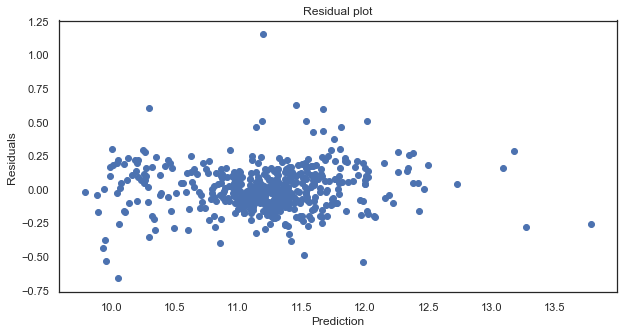

In [310]:
# Defining Graph size
plt.figure(figsize=(10,5))

# Defining the residue and model predicted results
df_categorized_car_brands['PREDICTIONS'] = results.predict(X_test)
df_categorized_car_brands['RESIDUE'] = y_test - model_test_pred

# Plot your predicted values on the x-axis, and your residuals on the y-axis on Residue Plot
plt.scatter(df_categorized_car_brands['PREDICTIONS'], df_categorized_car_brands['RESIDUE'])
plt.title("Residual plot")
plt.xlabel("Prediction")
plt.ylabel("Residuals")

## Section 6.2: QQ Plot

C:\Users\xianj\Anaconda3\envs\metis\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\xianj\Anaconda3\envs\metis\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\xianj\Anaconda3\envs\metis\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Text(0.5, 1.0, 'Normal Q-Q plot')

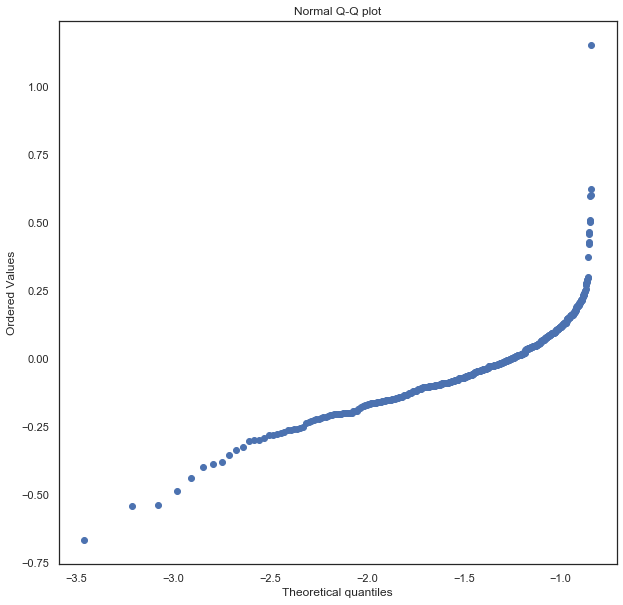

In [311]:
# Defining the residue and model predicted results
df_categorized_car_brands['PREDICTIONS'] = results.predict(X_test)
df_categorized_car_brands['RESIDUE'] = y_test - model_test_pred

# diagnose/inspect residual normality using QQplot:
plt.figure(figsize=(10,10))
stats.probplot(df_categorized_car_brands['RESIDUE'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")

In [331]:
test_df = df_logged_price_no_brands_only_mileage_logged.drop(['TRANSMISSION', 'PRICE_LOG', 'CURB_WEIGHT_KG'], axis=1)

test_df['SQRT_AGE'] = np.sqrt(test_df.CAR_AGE)
test_df['LOG_OMV'] = np.log(test_df.OMV)
test_df['LOG_COE_FROM_SCRAPE_DATE'] = np.log(test_df.COE_FROM_SCRAPE_DATE)
test_df['LOG_DAYS_OF_COE_LEFT'] = np.sqrt(test_df.DAYS_OF_COE_LEFT)
test_df['LOG_ENGINE_CC'] = np.log(test_df.ENGINE_CAPACITY_CC)

test_df = test_df[['MILEAGE_LOG', 'SQRT_AGE', 'LOG_OMV', 'LOG_COE_FROM_SCRAPE_DATE', 'LOG_DAYS_OF_COE_LEFT',
                  'LOG_ENGINE_CC']]

test_y = df_logged_price_no_brands_only_mileage_logged['PRICE_LOG']

In [332]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold  #Kfold will allow you to do cross validation


# Create 80% of train data. The code below will automate the cross-validation
X_train, X_test, y_train, y_test = train_test_split(test_df, test_y, test_size = 0.2, random_state=20)

In [335]:
# model / fit / summarize
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
lsm = sm.OLS(y_train, X_train)
results = lsm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PRICE_LOG   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     5229.
Date:                Tue, 29 Oct 2019   Prob (F-statistic):               0.00
Time:                        16:47:22   Log-Likelihood:                 961.20
No. Observations:                2067   AIC:                            -1908.
Df Residuals:                    2060   BIC:                            -1869.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.4613      0.130      3.540      0.000       0.206       0.717
MILEAGE_LOG                 -0.0080      0.005     -1.509      0.131      -0.018       0.002
SQRT_AGE                    -0.2812      0.008    -33.661      0.000      -0.298      -0.265
LOG_OMV                      0.6682      0.010     68.724      0.000       0.649       0.687
LOG_COE_FROM_SCRAPE_DATE     0.1674      0.010     16.483      0.000       0.147       0.187
LOG_DAYS_OF_COE_LEFT         0.0213      0.000     49.273      0.000       0.020       0.022
LOG_ENGINE_CC                0.2444      0.019     12.926      0.000       0.207       0.281
==============================================================================
Omnibus:                      121.567   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              474.527
Skew:                          -0.112   Prob(JB):                    9.07e-104
Kurtosis:                       5.336   Cond. No.                     1.98e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 3.3.4: Only Vehicle Types: R^2 Adjusted Analysis

In [218]:
df_categorized_car_brands.columns

Index(['BRAND', 'PRICE_LOG', 'MILEAGE_LOG', 'COE_FROM_SCRAPE_DATE',
       'DAYS_OF_COE_LEFT', 'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC',
       'CURB_WEIGHT_KG', 'NO_OF_OWNERS', 'TRANSMISSION',
       'VEHICLE_TYPE[T.Luxury Sedan]', 'VEHICLE_TYPE[T.MPV]',
       'VEHICLE_TYPE[T.Mid-Sized Sedan]', 'VEHICLE_TYPE[T.SUV]',
       'VEHICLE_TYPE[T.Sports Car]', 'VEHICLE_TYPE[T.Stationwagon]', 'EXOTIC',
       'ULTRA_LUXURY', 'LUXURY', 'MID_LEVEL', 'ECONOMY', 'BUDGET', 'Intercept',
       'BRAND[T.BMW]', 'BRAND[T.Bentley]', 'BRAND[T.Chevrolet]',
       'BRAND[T.Citroen]', 'BRAND[T.Ferrari]', 'BRAND[T.Honda]',
       'BRAND[T.Hyundai]', 'BRAND[T.Infiniti]', 'BRAND[T.Jaguar]',
       'BRAND[T.Kia]', 'BRAND[T.Lamborghini]', 'BRAND[T.Land Rover]',
       'BRAND[T.Lexus]', 'BRAND[T.MINI]', 'BRAND[T.Maserati]',
       'BRAND[T.Mazda]', 'BRAND[T.McLaren]', 'BRAND[T.Mercedes-Benz]',
       'BRAND[T.Mitsubishi]', 'BRAND[T.Nissan]', 'BRAND[T.Others]',
       'BRAND[T.Peugeot]', 'BRAND[T.Porsche]', 'BRAND

In [221]:
# Finding out new R^2 from log transformations of Log Price and Log Independent Variables (except Mileage)

# Slicing Variables
X = df_categorized_car_brands[['MILEAGE_LOG', 'COE_FROM_SCRAPE_DATE',
       'DAYS_OF_COE_LEFT', 'CAR_AGE', 'OMV', 'ENGINE_CAPACITY_CC',
       'CURB_WEIGHT_KG', 'NO_OF_OWNERS', 'TRANSMISSION', 'VEHICLE_TYPE[T.Luxury Sedan]',
       'VEHICLE_TYPE[T.MPV]', 'VEHICLE_TYPE[T.Mid-Sized Sedan]',
       'VEHICLE_TYPE[T.SUV]', 'VEHICLE_TYPE[T.Sports Car]']]
X = sm.add_constant(X)
y = df_categorized_car_brands['PRICE_LOG']


# model / fit / summarize
import statsmodels.api as sm

lsm = sm.OLS(y, X)
results = lsm.fit()
results.summary()

# After removing Curb Weight, R^2 Adjusted seems to remain at the same level.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PRICE_LOG   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     2039.
Date:                Tue, 29 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:55:42   Log-Likelihood:                 856.38
No. Observations:                2584   AIC:                            -1683.
Df Residuals:                    2569   BIC:                            -1595.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               9.6188      0.046    207.677      0.000       9.528       9.710
MILEAGE_LOG                     -7.182e-07   1.55e-07     -4.638      0.000   -1.02e-06   -4.15e-07
COE_FROM_SCRAPE_DATE             4.118e-06   2.76e-07     14.925      0.000    3.58e-06    4.66e-06
DAYS_OF_COE_LEFT                    0.0003   5.99e-06     45.169      0.000       0.000       0.000
CAR_AGE                            -0.0604      0.002    -25.607      0.000      -0.065      -0.056
OMV                              6.345e-06   1.65e-07     38.426      0.000    6.02e-06    6.67e-06
ENGINE_CAPACITY_CC               4.573e-05   1.06e-05      4.317      0.000     2.5e-05    6.65e-05
CURB_WEIGHT_KG                      0.0006   2.23e-05     28.672      0.000       0.001       0.001
NO_OF_OWNERS                       -0.0152      0.005     -3.033      0.002      -0.025      -0.005
TRANSMISSION                       -0.0821      0.030     -2.732      0.006      -0.141      -0.023
VEHICLE_TYPE[T.Luxury Sedan]        0.1107      0.012      8.938      0.000       0.086       0.135
VEHICLE_TYPE[T.MPV]                -0.0627      0.015     -4.261      0.000      -0.092      -0.034
VEHICLE_TYPE[T.Mid-Sized Sedan]    -0.0742      0.012     -6.364      0.000      -0.097      -0.051
VEHICLE_TYPE[T.SUV]                 0.0052      0.012      0.421      0.674      -0.019       0.029
VEHICLE_TYPE[T.Sports Car]          0.2555      0.016     15.896      0.000       0.224       0.287
==============================================================================
Omnibus:                      376.059   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4036.156
Skew:                          -0.309   Prob(JB):                         0.00
Kurtosis:                       9.091   Cond. No.                     1.42e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### R^2 Summary from Linear Regression Models
Log Price vs Original Independent Variables:  
R^2: **0.899**  
R^2 Adjusted: **0.898**  
  
Log Price vs Logged Independent Variables:  
R^2: **0.939**  
R^2 Adjusted: **0.939**  

Log Price vs Logged Independent Variables (except Mileage and removed Curb Weight):  
R^2: **0.940**  
R^2 Adjusted: **0.940**  

Log Price vs Logged Independent Variables (except Mileage and removed Curb Weight) with ONLY Vehicle Types:  
R^2: **0.941**  
R^2 Adjusted: **0.941**  

### 3.3.5: Only Brands: Analysis of R^2 Adjusted

In [94]:
# Finding out new R^2 from log transformations of Log Price and Log Independent Variables (except Mileage)

# Slicing Variables
X = df_categorized_car_brands[['MILEAGE_KM', 'COE_FROM_SCRAPE_DATE_LOG',
       'DAYS_OF_COE_LEFT', 'CAR_AGE', 'OMV_LOG', 'ENGINE_CAPACITY_CC_LOG',
       'NO_OF_OWNERS', 'TRANSMISSION', 'BRAND[T.BMW]',
       'BRAND[T.Bentley]', 'BRAND[T.Chevrolet]', 'BRAND[T.Citroen]',
       'BRAND[T.Ferrari]', 'BRAND[T.Honda]', 'BRAND[T.Hyundai]',
       'BRAND[T.Infiniti]', 'BRAND[T.Jaguar]', 'BRAND[T.Kia]',
       'BRAND[T.Lamborghini]', 'BRAND[T.Land Rover]', 'BRAND[T.Lexus]',
       'BRAND[T.MINI]', 'BRAND[T.Maserati]', 'BRAND[T.Mazda]',
       'BRAND[T.McLaren]', 'BRAND[T.Mercedes-Benz]', 'BRAND[T.Mitsubishi]',
       'BRAND[T.Nissan]', 'BRAND[T.Others]', 'BRAND[T.Peugeot]',
       'BRAND[T.Porsche]', 'BRAND[T.Renault]', 'BRAND[T.Rolls-Royce]',
       'BRAND[T.Subaru]', 'BRAND[T.Suzuki]', 'BRAND[T.Toyota]',
       'BRAND[T.Volkswagen]', 'BRAND[T.Volvo]']]
X = sm.add_constant(X)
y = df_categorized_car_brands['PRICE_LOG']


# model / fit / summarize
import statsmodels.api as sm

lsm = sm.OLS(y, X)
results = lsm.fit()
results.summary()

# After removing Curb Weight, R^2 Adjusted seems to remain at the same level.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PRICE_LOG   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     1224.
Date:                Tue, 29 Oct 2019   Prob (F-statistic):               0.00
Time:                        13:22:43   Log-Likelihood:                 1457.0
No. Observations:                2584   AIC:                            -2836.
Df Residuals:                    2545   BIC:                            -2608.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.9708      0.126     15.599      0.000       1.723       2.219
MILEAGE_KM               -7.002e-07   1.22e-07     -5.748      0.000   -9.39e-07   -4.61e-07
COE_FROM_SCRAPE_DATE_LOG     0.1135      0.009     12.861      0.000       0.096       0.131
DAYS_OF_COE_LEFT             0.0002   4.62e-06     52.930      0.000       0.000       0.000
CAR_AGE                     -0.0644      0.002    -33.811      0.000      -0.068      -0.061
OMV_LOG                      0.6012      0.014     43.202      0.000       0.574       0.629
ENGINE_CAPACITY_CC_LOG       0.2547      0.021     12.362      0.000       0.214       0.295
NO_OF_OWNERS                -0.0210      0.004     -5.210      0.000      -0.029      -0.013
TRANSMISSION                -0.1785      0.024     -7.402      0.000      -0.226      -0.131
BRAND[T.BMW]                 0.0211      0.015      1.405      0.160      -0.008       0.051
BRAND[T.Bentley]             0.4037      0.060      6.755      0.000       0.287       0.521
BRAND[T.Chevrolet]          -0.0267      0.036     -0.741      0.459      -0.097       0.044
BRAND[T.Citroen]            -0.1648      0.032     -5.101      0.000      -0.228      -0.101
BRAND[T.Ferrari]             0.3780      0.049      7.769      0.000       0.283       0.473
BRAND[T.Honda]              -0.0414      0.016     -2.537      0.011      -0.073      -0.009
BRAND[T.Hyundai]             0.0421      0.024      1.750      0.080      -0.005       0.089
BRAND[T.Infiniti]           -0.0441      0.039     -1.125      0.261      -0.121       0.033
BRAND[T.Jaguar]             -0.0401      0.032     -1.244      0.214      -0.103       0.023
BRAND[T.Kia]                -0.0034      0.023     -0.145      0.884      -0.049       0.042
BRAND[T.Lamborghini]         0.3276      0.061      5.344      0.000       0.207       0.448
BRAND[T.Land Rover]          0.0571      0.037      1.539      0.124      -0.016       0.130
BRAND[T.Lexus]               0.0282      0.024      1.176      0.240      -0.019       0.075
BRAND[T.MINI]                0.0497      0.025      1.961      0.050   -5.74e-06       0.099
BRAND[T.Maserati]            0.0575      0.037      1.547      0.122      -0.015       0.130
BRAND[T.Mazda]              -0.0713      0.019     -3.677      0.000      -0.109      -0.033
BRAND[T.McLaren]             0.4540      0.066      6.923      0.000       0.325       0.583
BRAND[T.Mercedes-Benz]       0.0704      0.014      4.910      0.000       0.042       0.099
BRAND[T.Mitsubishi]          0.0136      0.025      0.553      0.580      -0.035       0.062
BRAND[T.Nissan]             -0.0263      0.019     -1.421      0.155      -0.063       0.010
BRAND[T.Others]              0.0467      0.028      1.669      0.095      -0.008       0.101
BRAND[T.Peugeo

### R^2 Summary from Linear Regression Models
Log Price vs Original Independent Variables:  
R^2: **0.899**  
R^2 Adjusted: **0.898**  
  
Log Price vs Logged Independent Variables:  
R^2: **0.939**  
R^2 Adjusted: **0.939**  

Log Price vs Logged Independent Variables (except Mileage and removed Curb Weight):  
R^2: **0.940**  
R^2 Adjusted: **0.940**  

Log Price vs Logged Independent Variables (except Mileage and removed Curb Weight) with ONLY Vehicle Types:  
R^2: **0.941**  
R^2 Adjusted: **0.941**  
  
Log Price vs Logged Independent Variables (except Mileage and removed Curb Weight) with ONLY Brand:  
R^2: **0.941**  
R^2 Adjusted: **0.941**  

In [367]:
df_categorized_car_brands.columns

Index(['BRAND', 'PRICE_LOG', 'MILEAGE_KM', 'COE_FROM_SCRAPE_DATE_LOG',
       'DAYS_OF_COE_LEFT', 'CAR_AGE', 'OMV_LOG', 'ENGINE_CAPACITY_CC_LOG',
       'NO_OF_OWNERS', 'TRANSMISSION', 'VEHICLE_TYPE[T.Luxury Sedan]',
       'VEHICLE_TYPE[T.MPV]', 'VEHICLE_TYPE[T.Mid-Sized Sedan]',
       'VEHICLE_TYPE[T.SUV]', 'VEHICLE_TYPE[T.Sports Car]',
       'VEHICLE_TYPE[T.Stationwagon]', 'EXOTIC', 'ULTRA_LUXURY', 'LUXURY',
       'MID_LEVEL', 'ECONOMY', 'BUDGET', 'Intercept', 'BRAND[T.BMW]',
       'BRAND[T.Bentley]', 'BRAND[T.Chevrolet]', 'BRAND[T.Citroen]',
       'BRAND[T.Ferrari]', 'BRAND[T.Honda]', 'BRAND[T.Hyundai]',
       'BRAND[T.Infiniti]', 'BRAND[T.Jaguar]', 'BRAND[T.Kia]',
       'BRAND[T.Lamborghini]', 'BRAND[T.Land Rover]', 'BRAND[T.Lexus]',
       'BRAND[T.MINI]', 'BRAND[T.Maserati]', 'BRAND[T.Mazda]',
       'BRAND[T.McLaren]', 'BRAND[T.Mercedes-Benz]', 'BRAND[T.Mitsubishi]',
       'BRAND[T.Nissan]', 'BRAND[T.Others]', 'BRAND[T.Peugeot]',
       'BRAND[T.Porsche]', 'BRAND[T.Rena

### 3.3.6: Analyzing Model R^2 Adjusted with both Brand and Vehicle Types

In [369]:
# Finding out new R^2 from log transformations of Log Price and Log Independent Variables (except Mileage)

# Slicing Variables
X = df_categorized_car_brands[['MILEAGE_KM', 'COE_FROM_SCRAPE_DATE_LOG',
       'DAYS_OF_COE_LEFT', 'CAR_AGE', 'OMV_LOG', 'ENGINE_CAPACITY_CC_LOG',
       'NO_OF_OWNERS', 'TRANSMISSION', 'VEHICLE_TYPE[T.Luxury Sedan]',
       'VEHICLE_TYPE[T.MPV]', 'VEHICLE_TYPE[T.Mid-Sized Sedan]',
       'VEHICLE_TYPE[T.SUV]', 'VEHICLE_TYPE[T.Sports Car]',
       'VEHICLE_TYPE[T.Stationwagon]', 'EXOTIC', 'ULTRA_LUXURY', 'LUXURY',
       'MID_LEVEL', 'ECONOMY', 'BUDGET', 'Intercept', 'BRAND[T.BMW]',
       'BRAND[T.Bentley]', 'BRAND[T.Chevrolet]', 'BRAND[T.Citroen]',
       'BRAND[T.Ferrari]', 'BRAND[T.Honda]', 'BRAND[T.Hyundai]',
       'BRAND[T.Infiniti]', 'BRAND[T.Jaguar]', 'BRAND[T.Kia]',
       'BRAND[T.Lamborghini]', 'BRAND[T.Land Rover]', 'BRAND[T.Lexus]',
       'BRAND[T.MINI]', 'BRAND[T.Maserati]', 'BRAND[T.Mazda]',
       'BRAND[T.McLaren]', 'BRAND[T.Mercedes-Benz]', 'BRAND[T.Mitsubishi]',
       'BRAND[T.Nissan]', 'BRAND[T.Others]', 'BRAND[T.Peugeot]',
       'BRAND[T.Porsche]', 'BRAND[T.Renault]', 'BRAND[T.Rolls-Royce]',
       'BRAND[T.Subaru]', 'BRAND[T.Suzuki]', 'BRAND[T.Toyota]',
       'BRAND[T.Volkswagen]', 'BRAND[T.Volvo]']]
X = sm.add_constant(X)
y = df_categorized_car_brands['PRICE_LOG']


# model / fit / summarize
import statsmodels.api as sm

lsm = sm.OLS(y, X)
results = lsm.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PRICE_LOG   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     1018.
Date:                Mon, 28 Oct 2019   Prob (F-statistic):               0.00
Time:                        16:47:42   Log-Likelihood:                 1496.3
No. Observations:                2584   AIC:                            -2897.
Df Residuals:                    2536   BIC:                            -2615.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
MILEAGE_KM                      -6.115e-07   1.23e-07     -4.991      0.000   -8.52e-07   -3.71e-07
COE_FROM_SCRAPE_DATE_LOG            0.1123      0.009     12.657      0.000       0.095       0.130
DAYS_OF_COE_LEFT                    0.0002   4.62e-06     52.365      0.000       0.000       0.000
CAR_AGE                            -0.0656      0.002    -34.267      0.000      -0.069      -0.062
OMV_LOG                             0.5829      0.015     39.312      0.000       0.554       0.612
ENGINE_CAPACITY_CC_LOG              0.2393      0.021     11.654      0.000       0.199       0.280
NO_OF_OWNERS                       -0.0226      0.004     -5.639      0.000      -0.030      -0.015
TRANSMISSION                       -0.1683      0.024     -6.952      0.000      -0.216      -0.121
VEHICLE_TYPE[T.Luxury Sedan]       -0.0003      0.011     -0.024      0.981      -0.022       0.021
VEHICLE_TYPE[T.MPV]                 0.0526      0.013      4.008      0.000       0.027       0.078
VEHICLE_TYPE[T.Mid-Sized Sedan]     0.0350      0.011      3.246      0.001       0.014       0.056
VEHICLE_TYPE[T.SUV]                 0.0370      0.011      3.487      0.000       0.016       0.058
VEHICLE_TYPE[T.Sports Car]          0.0738      0.014      5.247      0.000       0.046       0.101
VEHICLE_TYPE[T.Stationwagon]        0.0252      0.022      1.162      0.245      -0.017       0.068
EXOTIC                              0.5719      0.101      5.642      0.000       0.373       0.771
ULTRA_LUXURY                        0.3452      0.036      9.538      0.000       0.274       0.416
LUXURY                              0.1994      0.030      6.717      0.000       0.141       0.258
MID_LEVEL                           0.0485      0.020      2.397      0.017       0.009       0.088
ECONOMY                             0.1106      0.061      1.825      0.068      -0.008       0.229
BUDGET                              0.0616      0.062      0.996      0.319      -0.060       0.183
Intercept                           2.0772      0.131     15.856      0.000       1.820       2.334
BRAND[T.BMW]                        0.0187      0.015      1.259      0.208      -0.010       0.048
BRAND[T.Bentley]                    0.2551      0.051      5.026      0.000       0.156       0.355
BRAND[T.Chevrolet]                  0.0197      0.086      0.229      0.819      -0.149       0.189
BRAND[T.Citroen]                   -0.1197      0.085     -1.411      0.158      -0.286       0.047
BRAND[T.Ferrari]                    0.0092      0.128      0.072      0.943      -0.242       0.261
BRAND[T.Honda]                      0.0196      0.080      0.245      0.807      -0.138       0.177
BRAND[T.Hyundai]                    0.0932      0.082      1.136      0.256      -0

### R^2 Summary from Linear Regression Models
Log Price vs Original Independent Variables:  
R^2: **0.899**  
R^2 Adjusted: **0.898**  
  
Log Price vs Logged Independent Variables:  
R^2: **0.939**  
R^2 Adjusted: **0.939**  

Log Price vs Logged Independent Variables (except Mileage and removed Curb Weight):  
R^2: **0.940**  
R^2 Adjusted: **0.940**  

Log Price vs Logged Independent Variables (except Mileage and removed Curb Weight) with ONLY Vehicle Types:  
R^2: **0.941**  
R^2 Adjusted: **0.941**  
  
Log Price vs Logged Independent Variables (except Mileage and removed Curb Weight) with ONLY Brand:  
R^2: **0.941**  
R^2 Adjusted: **0.941**   
  
Log Price vs Logged Independent Variables (except Mileage and removed Curb Weight) with BOTH Vehicle Type AND Brand:  
R^2: **0.941**  
R^2 Adjusted: **0.941**  

In [370]:
# Saving DataFrame
import pickle

# Saving DataFrame using Pickle
with open('dataframe_with_logged_features_and_dummy_vehicletype_and_brands.pickle', 'wb') as to_write:
    pickle.dump(df_categorized_car_brands, to_write)

# Or you can do it with this code too
# cars2.to_pickle('data/cars_dataframe.pkl')    
    
# Loading DataFrame using Pickle
# with open('dataframe_with_logged_features_and_dummy_vehicletype_and_brands.pickle','rb') as read_file:
#     new_df = pickle.load(read_file)
    
# new_df.head(5)

## Doing the Scatter Plot timer

In [ ]:
# sns.scatterplot(x = 'Depreciation', y = 'Days to Sell', s = 15, edgecolor=None,
#                      data=exotic)
# plt.xlim(0,80000)
# plt.ylim(0,80)
# plt.title('Exotic')

# sns.scatterplot(x = 'Depreciation', y = 'Days to Sell', s = 15, edgecolor=None,
#                      data=ultra_luxury)
# plt.title('Exotic + Ultra Luxury')

# sns.scatterplot(x = 'Depreciation', y = 'Days to Sell', s = 15, edgecolor=None,
#                      data=luxury)
# plt.title('(Exotic, Ultra Luxury) + Luxury')

# sns.scatterplot(x = 'Depreciation', y = 'Days to Sell', s = 15, edgecolor=None,
#                      data=mid_level)
# plt.title('(Exotic, Ultra Luxury, Luxury) + Mid Level')

# sns.scatterplot(x = 'Depreciation', y = 'Days to Sell", s = 15, edgecolor=None,
#                      data=economy)
# plt.title('(Exotic, Ultra Luxury, Luxury, Mid Level) + Economy')

# # colour of marker changed to white, default colour assigned is too difficult to spot on the plot.
# sns.scatterplot(x = 'Depreciation', y = 'Days to Sell', s = 15, color = 'white', edgecolor=None,
#                      data=budget)
# plt.title('(Exotic, Ultra Luxury, Luxury, Mid Level, Economy) + Budget')

In [ ]:
# can share about discovery - after log, get better results 
# Your journey on how to improve the R^2


# First you prsent soemthing not so good, then how you imrpove teh baseline. 
# Then people will be happoy to follow through your presentation

# WHat is your baseline model: what R^2 you get
# Then you start to explore: 
# Still not satisfied, then continue increasing R^2

# Section 4: Model Selection 
* Cross Validation
* Regularization - Elastic Net

## Section 4.1: Data Split

### Section 4.1.1: Train 80 / Test 20 Split

In [385]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [405]:
from sklearn.model_selection import train_test_split


X = df_categorized_car_brands[['MILEAGE_KM', 'COE_FROM_SCRAPE_DATE_LOG',
       'DAYS_OF_COE_LEFT', 'CAR_AGE', 'OMV_LOG', 'ENGINE_CAPACITY_CC_LOG',
       'NO_OF_OWNERS', 'TRANSMISSION', 'VEHICLE_TYPE[T.Luxury Sedan]',
       'VEHICLE_TYPE[T.MPV]', 'VEHICLE_TYPE[T.Mid-Sized Sedan]',
       'VEHICLE_TYPE[T.SUV]', 'VEHICLE_TYPE[T.Sports Car]',
       'VEHICLE_TYPE[T.Stationwagon]', 'EXOTIC', 'ULTRA_LUXURY', 'LUXURY',
       'MID_LEVEL', 'ECONOMY', 'BUDGET', 'Intercept', 'BRAND[T.BMW]',
       'BRAND[T.Bentley]', 'BRAND[T.Chevrolet]', 'BRAND[T.Citroen]',
       'BRAND[T.Ferrari]', 'BRAND[T.Honda]', 'BRAND[T.Hyundai]',
       'BRAND[T.Infiniti]', 'BRAND[T.Jaguar]', 'BRAND[T.Kia]',
       'BRAND[T.Lamborghini]', 'BRAND[T.Land Rover]', 'BRAND[T.Lexus]',
       'BRAND[T.MINI]', 'BRAND[T.Maserati]', 'BRAND[T.Mazda]',
       'BRAND[T.McLaren]', 'BRAND[T.Mercedes-Benz]', 'BRAND[T.Mitsubishi]',
       'BRAND[T.Nissan]', 'BRAND[T.Others]', 'BRAND[T.Peugeot]',
       'BRAND[T.Porsche]', 'BRAND[T.Renault]', 'BRAND[T.Rolls-Royce]',
       'BRAND[T.Subaru]', 'BRAND[T.Suzuki]', 'BRAND[T.Toyota]',
       'BRAND[T.Volkswagen]', 'BRAND[T.Volvo]']]
y = df_categorized_car_brands['PRICE_LOG']

# hold out 20% of the data for final testing
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)


#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

### (tbh screw this method because you already have LassoCV/RidgeCV) Section 4.1.2: Train 60 / Validation Split

In [384]:
# # #this helps with the way kf will generate indices below
# X_train_val = np.array(X_train_val)
# y = np.array(y_train_val)

# X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25,random_state=3)


# # Mean Absolute Error (MAE) for validation
# def mae(y_true, y_pred):
#     return np.mean(np.abs(y_pred - y_true)) 

## Section 4.2 (Optional): Manual Cross-Validation

In [ ]:
# #run the CV

# kf = KFold(n_splits=5, shuffle=True, random_state = 71) 
# cv_lm_r2s, cv_lm_reg_r2s = [], [] #to collect the validation results for both models

# for train_ind, val_ind in kf.split(X,y): # len(kf.split(X.y)) should be 5 since you set n_split=5
#     # looping through each subset of kfold and running the whole training code
    
#     X_train, y_train = X[train_ind], y[train_ind]
#     X_val, y_val = X[val_ind], y[val_ind] 
    
#     #simple linear regression
#     lm = LinearRegression()
#     lm_reg = Ridge(alpha=1)

#     lm.fit(X_train, y_train)
#     cv_lm_r2s.append(lm.score(X_val, y_val))
    
#     #ridge with feature scaling
#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_val_scaled = scaler.transform(X_val)
    
#     lm_reg.fit(X_train_scaled, y_train)
#     cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))

# print('Simple regression scores: ', cv_lm_r2s)  # The whole list of simple Linear Regression score
# print('Ridge scores: ', cv_lm_reg_r2s, '\n')  # The whole list of Ridge Linear Regression score

# print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
# print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}')

## Section 4.2: Cross-Validation Using Models other than LR

### Section 4.2.1 : Using LassoCV to find best Alpha Value for L1 Regularization

In [483]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold  #Kfold will allow you to do cross validation

X = df_categorized_car_brands[['MILEAGE_KM', 'COE_FROM_SCRAPE_DATE_LOG',
       'DAYS_OF_COE_LEFT', 'CAR_AGE', 'OMV_LOG', 'ENGINE_CAPACITY_CC_LOG',
       'NO_OF_OWNERS', 'TRANSMISSION', 'VEHICLE_TYPE[T.Luxury Sedan]',
       'VEHICLE_TYPE[T.MPV]', 'VEHICLE_TYPE[T.Mid-Sized Sedan]',
       'VEHICLE_TYPE[T.SUV]', 'VEHICLE_TYPE[T.Sports Car]',
       'VEHICLE_TYPE[T.Stationwagon]', 'EXOTIC', 'ULTRA_LUXURY', 'LUXURY',
       'MID_LEVEL', 'ECONOMY', 'BUDGET', 'Intercept', 'BRAND[T.BMW]',
       'BRAND[T.Bentley]', 'BRAND[T.Chevrolet]', 'BRAND[T.Citroen]',
       'BRAND[T.Ferrari]', 'BRAND[T.Honda]', 'BRAND[T.Hyundai]',
       'BRAND[T.Infiniti]', 'BRAND[T.Jaguar]', 'BRAND[T.Kia]',
       'BRAND[T.Lamborghini]', 'BRAND[T.Land Rover]', 'BRAND[T.Lexus]',
       'BRAND[T.MINI]', 'BRAND[T.Maserati]', 'BRAND[T.Mazda]',
       'BRAND[T.McLaren]', 'BRAND[T.Mercedes-Benz]', 'BRAND[T.Mitsubishi]',
       'BRAND[T.Nissan]', 'BRAND[T.Others]', 'BRAND[T.Peugeot]',
       'BRAND[T.Porsche]', 'BRAND[T.Renault]', 'BRAND[T.Rolls-Royce]',
       'BRAND[T.Subaru]', 'BRAND[T.Suzuki]', 'BRAND[T.Toyota]',
       'BRAND[T.Volkswagen]', 'BRAND[T.Volvo]']]

y = df_categorized_car_brands['PRICE_LOG']

# hold out 20% of the data for final testing

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)


X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.2, random_state=10)

NameError: name 'df_categorized_car_brands' is not defined

In [485]:

## Scale the data (a MUST if you're doing regularization)
std = StandardScaler()
std.fit(X_train.values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [486]:
## Scale the Predictors on both the train/validation (the whole 80%) and test set (the whole 20%)
X_train_scaled = std.transform(X_train.values)
X_val_scaled = std.transform(X_val.values)

# LassoCV does 2 things for you. It trains your model, and it also chooses the best lambda/alpha for you.  
# But of course, you have to feed it a list of lambdas to try.

In [487]:
# The best part about LambdaCV is that it does all 3 for you:
# Fit
# Finding best lambda
# Doing Cross-Validation

from sklearn.model_selection import KFold   #Kfold will allow you to do cross validation

# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-3,3,200) # Defining a vector of lambdas (alpha) to try from
kf = KFold(n_splits=5, shuffle=True, random_state = 1000)  # Creating a partitioned randomized-state data

lasso_model = LassoCV(alphas = alphavec, cv=kf)  # If you want to use Ridge, use RidgeCV
lasso_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([1.00000000e-03, 1.07189132e-03, 1.14895100e-03, 1.23155060e-03,
       1.32008840e-03, 1.41499130e-03, 1.51671689e-03, 1.62575567e-03,
       1.74263339e-03, 1.86791360e-03, 2.00220037e-03, 2.14614120e-03,
       2.30043012e-03, 2.46581108e-03, 2.64308149e-03, 2.83309610e-03,
       3.03677112e-03, 3.25508860e-03, 3.48910121e-03, 3.73993730e-03,
       4.00880633e-03, 4.29700470e-0...
       6.15098579e+02, 6.59318827e+02, 7.06718127e+02, 7.57525026e+02,
       8.11984499e+02, 8.70359136e+02, 9.32930403e+02, 1.00000000e+03]),
        copy_X=True, cv=KFold(n_splits=5, random_state=1000, shuffle=True),
        eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=None,
        normalize=False, positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [488]:
# This is the best alpha value it found - not far from the value
# selected using simple validation
lasso_model.alpha_

0.001

In [489]:
# These are the (standardized) coefficients found when it refit using that best alpha
list(zip(X_train.columns, lasso_model.coef_))

[('MILEAGE_KM', -0.032011450340970256),
 ('COE_FROM_SCRAPE_DATE_LOG', 0.04575095023532634),
 ('DAYS_OF_COE_LEFT', 0.19161798325521512),
 ('CAR_AGE', -0.20741495142435332),
 ('OMV_LOG', 0.33620060503558286),
 ('ENGINE_CAPACITY_CC_LOG', 0.06907973980631524),
 ('NO_OF_OWNERS', -0.016924108861513028),
 ('TRANSMISSION', -0.025721536035674238),
 ('VEHICLE_TYPE[T.Luxury Sedan]', -0.004327891961768283),
 ('VEHICLE_TYPE[T.MPV]', 0.00942465535739407),
 ('VEHICLE_TYPE[T.Mid-Sized Sedan]', 0.00695690161471531),
 ('VEHICLE_TYPE[T.SUV]', 0.011442515844618813),
 ('VEHICLE_TYPE[T.Sports Car]', 0.018045416368581372),
 ('VEHICLE_TYPE[T.Stationwagon]', 0.0004827361227385847),
 ('EXOTIC', 0.03050999913247309),
 ('ULTRA_LUXURY', 0.011426089492177327),
 ('LUXURY', 0.0),
 ('MID_LEVEL', -0.006425290628674362),
 ('ECONOMY', -0.015196112794216421),
 ('BUDGET', -0.005002407381890161),
 ('Intercept', 0.0),
 ('BRAND[T.BMW]', 0.004250074159219999),
 ('BRAND[T.Bentley]', 0.0150400784078062),
 ('BRAND[T.Chevrolet]', 

In [490]:
# Make predictions on the test set using the new model 
# (the model is already using the best alpha. It is a LassoCV initialization)
val_set_pred = lasso_model.predict(X_val_scaled)

In [491]:
# Find the MAE and R^2 on the test set using this model
print(f"Best Lambda (alpha) LassoCV: {lasso_model.alpha_}")
print(f"LassoCV MAE: {mae(y_val, val_set_pred)}")
print(f"LassoCV R^2 Score: {r2_score(y_val, val_set_pred)}")

Best Lambda (alpha) LassoCV: 0.001
LassoCV MAE: 0.0930728082873645
LassoCV R^2 Score: 0.9546411724617769


### Section 4.2.1.1 (Optional for now): Using LARS Path to Study Feature Importance

In [424]:
# from sklearn.linear_model import lars_path
# ## Scale the variables
# std = StandardScaler()
# std.fit(X_train_val.values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [425]:
# X_train_val_scaled = std.transform(X_train_val.values)

In [427]:
# ## Note: lars_path takes numpy matrices, not pandas dataframes
# from sklearn.linear_model import lars_path

# print("Computing regularization path using the LARS ...")
# alphas, _, coefs = lars_path(X_train_val_scaled, y_train_val.values, method='lasso')

Computing regularization path using the LARS ...


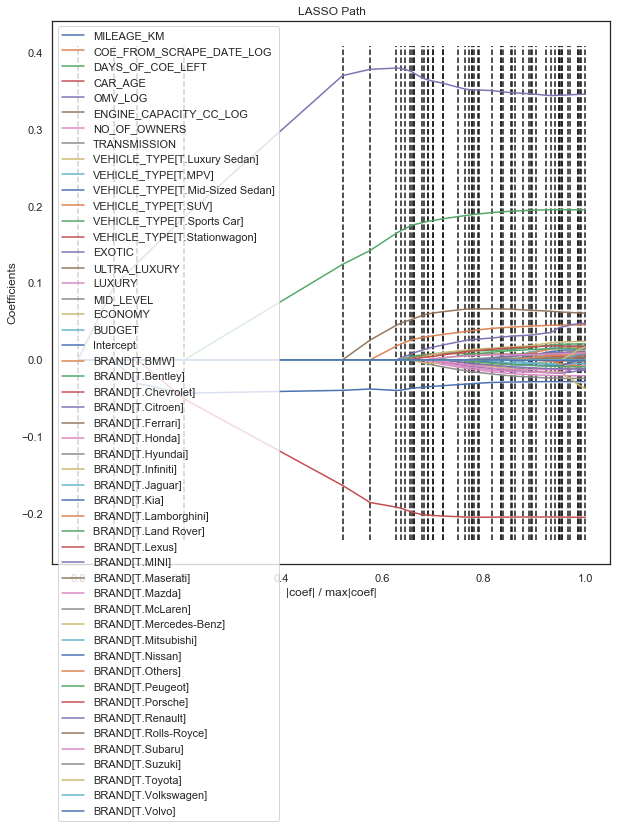

In [429]:
# # plotting the LARS path

# xx = np.sum(np.abs(coefs.T), axis=1)
# xx /= xx[-1]

# plt.figure(figsize=(10,10))
# plt.plot(xx, coefs.T)
# ymin, ymax = plt.ylim()
# plt.vlines(xx, ymin, ymax, linestyle='dashed')
# plt.xlabel('|coef| / max|coef|')
# plt.ylabel('Coefficients')
# plt.title('LASSO Path')
# plt.axis('tight')
# plt.legend(X_train_val.columns)
# plt.show()

### Section 4.2.2: Using RidgeCV to find best Alpha Value for L2 Regularization

In [492]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [493]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold  #Kfold will allow you to do cross validation

X = df_categorized_car_brands[['MILEAGE_KM', 'COE_FROM_SCRAPE_DATE_LOG',
       'DAYS_OF_COE_LEFT', 'CAR_AGE', 'OMV_LOG', 'ENGINE_CAPACITY_CC_LOG',
       'NO_OF_OWNERS', 'TRANSMISSION', 'VEHICLE_TYPE[T.Luxury Sedan]',
       'VEHICLE_TYPE[T.MPV]', 'VEHICLE_TYPE[T.Mid-Sized Sedan]',
       'VEHICLE_TYPE[T.SUV]', 'VEHICLE_TYPE[T.Sports Car]',
       'VEHICLE_TYPE[T.Stationwagon]', 'EXOTIC', 'ULTRA_LUXURY', 'LUXURY',
       'MID_LEVEL', 'ECONOMY', 'BUDGET', 'Intercept', 'BRAND[T.BMW]',
       'BRAND[T.Bentley]', 'BRAND[T.Chevrolet]', 'BRAND[T.Citroen]',
       'BRAND[T.Ferrari]', 'BRAND[T.Honda]', 'BRAND[T.Hyundai]',
       'BRAND[T.Infiniti]', 'BRAND[T.Jaguar]', 'BRAND[T.Kia]',
       'BRAND[T.Lamborghini]', 'BRAND[T.Land Rover]', 'BRAND[T.Lexus]',
       'BRAND[T.MINI]', 'BRAND[T.Maserati]', 'BRAND[T.Mazda]',
       'BRAND[T.McLaren]', 'BRAND[T.Mercedes-Benz]', 'BRAND[T.Mitsubishi]',
       'BRAND[T.Nissan]', 'BRAND[T.Others]', 'BRAND[T.Peugeot]',
       'BRAND[T.Porsche]', 'BRAND[T.Renault]', 'BRAND[T.Rolls-Royce]',
       'BRAND[T.Subaru]', 'BRAND[T.Suzuki]', 'BRAND[T.Toyota]',
       'BRAND[T.Volkswagen]', 'BRAND[T.Volvo]']]
y = df_categorized_car_brands['PRICE_LOG']

# hold out 20% of the data for final testing
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.2, random_state=10)

In [494]:
# Use RidgeCV to find the optimal ALPHA value for L2 regularization

## Scale the data (a MUST if you're doing regularization)
std = StandardScaler()
std.fit(X_train.values)

# Scale the Predictors on both the train and validation set (for RidgeCV)
X_train_scaled = std.transform(X_train.values)
X_val_scaled = std.transform(X_val.values)

# Run the cross-validation, find the best alpha, refit the model on all the data with that alpha (RidgeCV does this for you)
alphavec = 10 ** np.linspace(-3,3,200) # alpha varies from 0.001 to 1000
kf = KFold(n_splits=5, shuffle=True, random_state=1000)

ridge_model = RidgeCV(alphas=alphavec, cv=kf)
ridge_model.fit(X_train_scaled, y_train)  # Fit your scaled train input and your y train values


# This is the best alpha value found
ridge_model.alpha_

2.5529080682395167

In [495]:
# display all coefficients in the model with optimal alpha
list(zip(X_train.columns, ridge_model.coef_))

[('MILEAGE_KM', -0.03300840629477775),
 ('COE_FROM_SCRAPE_DATE_LOG', 0.04696228909023782),
 ('DAYS_OF_COE_LEFT', 0.1918085050233663),
 ('CAR_AGE', -0.2063458210053282),
 ('OMV_LOG', 0.3341453848723921),
 ('ENGINE_CAPACITY_CC_LOG', 0.06713644138754461),
 ('NO_OF_OWNERS', -0.018316777694665068),
 ('TRANSMISSION', -0.026731297615032238),
 ('VEHICLE_TYPE[T.Luxury Sedan]', -0.0019856441969261104),
 ('VEHICLE_TYPE[T.MPV]', 0.015445034608624491),
 ('VEHICLE_TYPE[T.Mid-Sized Sedan]', 0.01228601667274234),
 ('VEHICLE_TYPE[T.SUV]', 0.016230488197249284),
 ('VEHICLE_TYPE[T.Sports Car]', 0.021541036846664988),
 ('VEHICLE_TYPE[T.Stationwagon]', 0.0027276526641671754),
 ('EXOTIC', 0.0448117140479195),
 ('ULTRA_LUXURY', 0.01571240601863962),
 ('LUXURY', 0.0055744677900481),
 ('MID_LEVEL', -0.00415000660901384),
 ('ECONOMY', -0.02066707314991139),
 ('BUDGET', -0.006385439014054026),
 ('Intercept', 0.0),
 ('BRAND[T.BMW]', 0.007355181319224209),
 ('BRAND[T.Bentley]', 0.016094912533494852),
 ('BRAND[T.Ch

In [496]:
# Make predictions on the test set using the new model and save it into a variable
val_set_pred = lasso_model.predict(X_val_scaled)


# Find the MAE and R^2 on the test set using this model
print(f"Best Lambda (alpha) RidgeCV: {ridge_model.alpha_}")
print(f"RidgeCV MAE: {mae(y_val, val_set_pred)}")
print(f"RidgeCV R^2 Score: {r2_score(y_val, val_set_pred)}")

Best Lambda (alpha) RidgeCV: 2.5529080682395167
RidgeCV MAE: 0.0930728082873645
RidgeCV R^2 Score: 0.9546411724617769


### Section 4.2.3: Using ElasticnetCV to find best Alpha Value 

In [497]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold  #Kfold will allow you to do cross validation

X = df_categorized_car_brands[['MILEAGE_KM', 'COE_FROM_SCRAPE_DATE_LOG',
       'DAYS_OF_COE_LEFT', 'CAR_AGE', 'OMV_LOG', 'ENGINE_CAPACITY_CC_LOG',
       'NO_OF_OWNERS', 'TRANSMISSION', 'VEHICLE_TYPE[T.Luxury Sedan]',
       'VEHICLE_TYPE[T.MPV]', 'VEHICLE_TYPE[T.Mid-Sized Sedan]',
       'VEHICLE_TYPE[T.SUV]', 'VEHICLE_TYPE[T.Sports Car]',
       'VEHICLE_TYPE[T.Stationwagon]', 'EXOTIC', 'ULTRA_LUXURY', 'LUXURY',
       'MID_LEVEL', 'ECONOMY', 'BUDGET', 'Intercept', 'BRAND[T.BMW]',
       'BRAND[T.Bentley]', 'BRAND[T.Chevrolet]', 'BRAND[T.Citroen]',
       'BRAND[T.Ferrari]', 'BRAND[T.Honda]', 'BRAND[T.Hyundai]',
       'BRAND[T.Infiniti]', 'BRAND[T.Jaguar]', 'BRAND[T.Kia]',
       'BRAND[T.Lamborghini]', 'BRAND[T.Land Rover]', 'BRAND[T.Lexus]',
       'BRAND[T.MINI]', 'BRAND[T.Maserati]', 'BRAND[T.Mazda]',
       'BRAND[T.McLaren]', 'BRAND[T.Mercedes-Benz]', 'BRAND[T.Mitsubishi]',
       'BRAND[T.Nissan]', 'BRAND[T.Others]', 'BRAND[T.Peugeot]',
       'BRAND[T.Porsche]', 'BRAND[T.Renault]', 'BRAND[T.Rolls-Royce]',
       'BRAND[T.Subaru]', 'BRAND[T.Suzuki]', 'BRAND[T.Toyota]',
       'BRAND[T.Volkswagen]', 'BRAND[T.Volvo]']]
y = df_categorized_car_brands['PRICE_LOG']

# hold out 20% of the data for final testing
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.2, random_state=10)

In [499]:
# Using ElasticNetCV to find the optimal ALPHA value
# Scale the data as before (scaling is a must for regularization)
std = StandardScaler()
std.fit(X_train.values) # (60% of the data)

# Scale the Predictors on both the train and validation set
X_train_scaled = std.transform(X_train.values)
X_val_scalred = std.transform(X_val.values)

# Run the cross-validation, find the best alpha, refit the model and all the data using that alpha (ElasticNetCV does this for you)
alphavec = 10 ** np.linspace(-3,3,200)  # alpha varies from 0.001 to 1000
kf = KFold(n_splits=5, shuffle=True, random_state=1000)

elasticnet_model = ElasticNetCV(alphas = alphavec, cv=kf)
elasticnet_model.fit(X_train_scaled, y_train)  # Fitting standardscaled input and true y values into model to train it

elasticnet_model.alpha_


0.001

In [500]:
# display all coefficients in the model with optimal alpha
list(zip(X_train.columns, elasticnet_model.coef_))

[('MILEAGE_KM', -0.03233755528978147),
 ('COE_FROM_SCRAPE_DATE_LOG', 0.04630208399416842),
 ('DAYS_OF_COE_LEFT', 0.19191699686729474),
 ('CAR_AGE', -0.2068704303258379),
 ('OMV_LOG', 0.3349524529304342),
 ('ENGINE_CAPACITY_CC_LOG', 0.06839961028883336),
 ('NO_OF_OWNERS', -0.017702493146917197),
 ('TRANSMISSION', -0.02627206769843484),
 ('VEHICLE_TYPE[T.Luxury Sedan]', -0.003102143389325614),
 ('VEHICLE_TYPE[T.MPV]', 0.012515582382393394),
 ('VEHICLE_TYPE[T.Mid-Sized Sedan]', 0.00973310663250216),
 ('VEHICLE_TYPE[T.SUV]', 0.013966207900677827),
 ('VEHICLE_TYPE[T.Sports Car]', 0.019738988076676834),
 ('VEHICLE_TYPE[T.Stationwagon]', 0.0015782661044366774),
 ('EXOTIC', 0.0339582915795018),
 ('ULTRA_LUXURY', 0.012403871115510648),
 ('LUXURY', 0.0),
 ('MID_LEVEL', -0.006529546662037074),
 ('ECONOMY', -0.016402174750696115),
 ('BUDGET', -0.0058074455661480725),
 ('Intercept', 0.0),
 ('BRAND[T.BMW]', 0.005709633162699246),
 ('BRAND[T.Bentley]', 0.0155788705047593),
 ('BRAND[T.Chevrolet]', -0.

In [501]:
# Use this model to do prediction on a validation data set
val_set_pred = elasticnet_model.predict(X_val_scaled)

# Find the MAE and R^2 on the test set using this model
print(f'Best Lambda (Alpha) ElasticNetCV: {elasticnet_model.alpha_}')
print(f'ElasticNetCV MAE: {mae(y_val, val_set_pred)}')  # mae is a defined function above
print(f'ElasticNetCV R^2 Score: {r2_score(y_val, val_set_pred)}')  # r2_score is an imported module

Best Lambda (Alpha) ElasticNetCV: 0.001
ElasticNetCV MAE: 0.09296420321879265
ElasticNetCV R^2 Score: 0.9547121202618065


### Section 4.2.3: Using Cross_val_score to find best LR R^2

In [502]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [503]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold  #Kfold will allow you to do cross validation

X = df_categorized_car_brands[['MILEAGE_KM', 'COE_FROM_SCRAPE_DATE_LOG',
       'DAYS_OF_COE_LEFT', 'CAR_AGE', 'OMV_LOG', 'ENGINE_CAPACITY_CC_LOG',
       'NO_OF_OWNERS', 'TRANSMISSION', 'VEHICLE_TYPE[T.Luxury Sedan]',
       'VEHICLE_TYPE[T.MPV]', 'VEHICLE_TYPE[T.Mid-Sized Sedan]',
       'VEHICLE_TYPE[T.SUV]', 'VEHICLE_TYPE[T.Sports Car]',
       'VEHICLE_TYPE[T.Stationwagon]', 'EXOTIC', 'ULTRA_LUXURY', 'LUXURY',
       'MID_LEVEL', 'ECONOMY', 'BUDGET', 'Intercept', 'BRAND[T.BMW]',
       'BRAND[T.Bentley]', 'BRAND[T.Chevrolet]', 'BRAND[T.Citroen]',
       'BRAND[T.Ferrari]', 'BRAND[T.Honda]', 'BRAND[T.Hyundai]',
       'BRAND[T.Infiniti]', 'BRAND[T.Jaguar]', 'BRAND[T.Kia]',
       'BRAND[T.Lamborghini]', 'BRAND[T.Land Rover]', 'BRAND[T.Lexus]',
       'BRAND[T.MINI]', 'BRAND[T.Maserati]', 'BRAND[T.Mazda]',
       'BRAND[T.McLaren]', 'BRAND[T.Mercedes-Benz]', 'BRAND[T.Mitsubishi]',
       'BRAND[T.Nissan]', 'BRAND[T.Others]', 'BRAND[T.Peugeot]',
       'BRAND[T.Porsche]', 'BRAND[T.Renault]', 'BRAND[T.Rolls-Royce]',
       'BRAND[T.Subaru]', 'BRAND[T.Suzuki]', 'BRAND[T.Toyota]',
       'BRAND[T.Volkswagen]', 'BRAND[T.Volvo]']]
y = df_categorized_car_brands['PRICE_LOG']

# hold out 20% of the data for final testing
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.2, random_state=10)

In [517]:
from sklearn.model_selection import cross_val_score

# Initializing LR Model
lm = LinearRegression()

# setting a random seed for the shuffling
kf = KFold(n_splits=5, shuffle=True, random_state = 1000)  

# Returns you the validation score for each of the 5 kfolds
cross_val_score(lm, X_train_val, y_train_val, # estimator/model, features, target
                cv=kf, # number of folds 
                scoring='r2') # scoring metric    
lm.fit(sm.add_constant(X_train), y_train)
val_set_pred = lm.predict(X_val)

print("Linear Regression MAE: {}".format(mae(y_val, val_set_pred)))
print("Linear Regression R^2 Score: {}".format(np.mean(cross_val_score(lm, X_train_val, y_train_val, cv=kf, scoring = 'r2'))))

Linear Regression MAE: 0.09301546518918193
Linear Regression R^2 Score: 0.9458506849389228


C:\Users\User\.conda\envs\metis\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Section 4.2.3: Summary from the above Train-Validation Sets

In [ ]:
# Use linear regression because no need tuning. Vanilla. Not need flavors and you still get a significant result

Linear Regresion MAE: 0.09301546518918193   
Linear Regression R^2 Score: **0.9458506849389228** 

  
LassoCV Best Lambda (alpha): 0.001  
LassoCV MAE: 0.0930728082873645  
LassoCV R^2 Score: **0.9546411724617769**  
  
  
RidgeCV Best Lambda (alpha): 2.5529080682395167  
RidgeCV MAE: 0.0930728082873645  
RidgeCV R^2 Score: **0.9546411724617769**  
  
  
ElasticNetCV Best Lambda (Alpha): 0.001  
ElasticNetCV MAE: 0.09296420321879265  
ElasticNetCV R^2 Score: **0.9547121202618065**

From the above, it shows that other models are better than Linear Regression. Therefore, I'll pick ElasticNet as the model to use

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold  #Kfold will allow you to do cross validation

X = df_categorized_car_brands[['MILEAGE_KM', 'COE_FROM_SCRAPE_DATE_LOG',
       'DAYS_OF_COE_LEFT', 'CAR_AGE', 'OMV_LOG', 'ENGINE_CAPACITY_CC_LOG',
       'NO_OF_OWNERS', 'TRANSMISSION', 'VEHICLE_TYPE[T.Luxury Sedan]',
       'VEHICLE_TYPE[T.MPV]', 'VEHICLE_TYPE[T.Mid-Sized Sedan]',
       'VEHICLE_TYPE[T.SUV]', 'VEHICLE_TYPE[T.Sports Car]',
       'VEHICLE_TYPE[T.Stationwagon]', 'EXOTIC', 'ULTRA_LUXURY', 'LUXURY',
       'MID_LEVEL', 'ECONOMY', 'BUDGET', 'Intercept', 'BRAND[T.BMW]',
       'BRAND[T.Bentley]', 'BRAND[T.Chevrolet]', 'BRAND[T.Citroen]',
       'BRAND[T.Ferrari]', 'BRAND[T.Honda]', 'BRAND[T.Hyundai]',
       'BRAND[T.Infiniti]', 'BRAND[T.Jaguar]', 'BRAND[T.Kia]',
       'BRAND[T.Lamborghini]', 'BRAND[T.Land Rover]', 'BRAND[T.Lexus]',
       'BRAND[T.MINI]', 'BRAND[T.Maserati]', 'BRAND[T.Mazda]',
       'BRAND[T.McLaren]', 'BRAND[T.Mercedes-Benz]', 'BRAND[T.Mitsubishi]',
       'BRAND[T.Nissan]', 'BRAND[T.Others]', 'BRAND[T.Peugeot]',
       'BRAND[T.Porsche]', 'BRAND[T.Renault]', 'BRAND[T.Rolls-Royce]',
       'BRAND[T.Subaru]', 'BRAND[T.Suzuki]', 'BRAND[T.Toyota]',
       'BRAND[T.Volkswagen]', 'BRAND[T.Volvo]']]
y = df_categorized_car_brands['PRICE_LOG']

# hold out 20% of the data for final testing
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.2, random_state=10)

In [522]:
## cross validation using KFold (on the 100% dataset, without manually splitting)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Feature transform/scaling so that we can run our ridge/lasso/elasticnet model 
scaler = StandardScaler()
X_train_val_scaled = scaler.fit_transform(X_train_val.values)

#Feature transform/scaling so that we can run our poly model 
poly = PolynomialFeatures(degree=2) 
X_train_val_poly = poly.fit_transform(X_train_val.values)

kf = KFold(n_splits=5, shuffle=True, random_state = 1000)

lm = LinearRegression()
cvs_lm = cross_val_score(lm, X_train_val, y_train_val, cv=kf, scoring='r2')
print("Linear Regression Cross Val Score: {}".format(cvs_lm))
print('Linear regression cv R^2:', round(np.mean(cvs_lm),3), '+-', round(np.std(cvs_lm),3),'\n' )


lm_ridge = Ridge(alpha=2.5529080682395167)
cvs_ridge = cross_val_score(lm_ridge, X_train_val_scaled, y_train_val, cv=kf, scoring='r2')
print("Ridge Cross Val Score: {}".format(cvs_ridge))
print('Ridge regression cv R^2:', round(np.mean(cvs_ridge),3), '+-', round(np.std(cvs_ridge),3),'\n' )



lm_lasso = Lasso(alpha=0.001)
cvs_lasso = cross_val_score(lm_lasso, X_train_val_scaled, y_train_val, cv=kf, scoring='r2')
print("Lasso Cross Val Score: {}".format(cvs_lasso))
print('Lasso regression cv R^2:', round(np.mean(cvs_lasso),3), '+-', round(np.std(cvs_lasso),3),'\n' )



lm_elasticnet = ElasticNet(alpha=0.001)
cvs_elasticnet = cross_val_score(lm_elasticnet, X_train_val_scaled, y_train_val, cv=kf, scoring='r2')
print("Elastic Net Cross Val Score: {}".format(cvs_elasticnet))
print('ElasticNet regression cv R^2:', round(np.mean(cvs_elasticnet),3), '+-', round(np.std(cvs_elasticnet),3),'\n' )


lm_poly = LinearRegression()
cvs_poly = cross_val_score(lm_poly, X_train_val_poly, y_train_val, cv=kf, scoring='r2')
print("Poly Regression Cross Val Score: {}".format(cvs_poly))
print('Degree 2 polynomial Regression cv R^2:', round(np.mean(cvs_poly),3), '+-', round(np.std(cvs_poly),3) )

Linear Regression Cross Val Score: [0.9486159  0.93715322 0.95806218 0.94232121 0.94310092]
Linear regression cv R^2: 0.946 +- 0.007 

Ridge Cross Val Score: [0.94902562 0.93712432 0.95795696 0.94194567 0.94311097]
Ridge regression cv R^2: 0.946 +- 0.007 

Lasso Cross Val Score: [0.94975848 0.93716628 0.95825058 0.94251208 0.94349464]
Lasso regression cv R^2: 0.946 +- 0.007 

Elastic Net Cross Val Score: [0.94961984 0.93716941 0.95822859 0.94249821 0.94328557]
ElasticNet regression cv R^2: 0.946 +- 0.007 

Poly Regression Cross Val Score: [-8.23632682e+00 -1.05785259e+01 -2.98685616e+00 -2.22851662e+10
 -3.90420378e+10]
Degree 2 polynomial Regression cv R^2: -12265440818.949 +- 15929244550.838


## From the above, it seems like linear regression is tied for the highest amongst all. Therefore, I have chosen to use Linear Regression as my final Model

# Section 5: Model Testing (On whole DataSet)

## Section 5.1: Training Model on 80% DataSet

In [550]:
## cross validation using KFold (on the 100% dataset, without manually splitting)
from sklearn.model_selection import train_test_split

X = df_categorized_car_brands[['MILEAGE_KM', 'COE_FROM_SCRAPE_DATE_LOG',
       'DAYS_OF_COE_LEFT', 'CAR_AGE', 'OMV_LOG', 'ENGINE_CAPACITY_CC_LOG',
       'NO_OF_OWNERS', 'TRANSMISSION', 'VEHICLE_TYPE[T.Luxury Sedan]',
       'VEHICLE_TYPE[T.MPV]', 'VEHICLE_TYPE[T.Mid-Sized Sedan]',
       'VEHICLE_TYPE[T.SUV]', 'VEHICLE_TYPE[T.Sports Car]',
       'VEHICLE_TYPE[T.Stationwagon]', 'EXOTIC', 'ULTRA_LUXURY', 'LUXURY',
       'MID_LEVEL', 'ECONOMY', 'BUDGET', 'Intercept', 'BRAND[T.BMW]',
       'BRAND[T.Bentley]', 'BRAND[T.Chevrolet]', 'BRAND[T.Citroen]',
       'BRAND[T.Ferrari]', 'BRAND[T.Honda]', 'BRAND[T.Hyundai]',
       'BRAND[T.Infiniti]', 'BRAND[T.Jaguar]', 'BRAND[T.Kia]',
       'BRAND[T.Lamborghini]', 'BRAND[T.Land Rover]', 'BRAND[T.Lexus]',
       'BRAND[T.MINI]', 'BRAND[T.Maserati]', 'BRAND[T.Mazda]',
       'BRAND[T.McLaren]', 'BRAND[T.Mercedes-Benz]', 'BRAND[T.Mitsubishi]',
       'BRAND[T.Nissan]', 'BRAND[T.Others]', 'BRAND[T.Peugeot]',
       'BRAND[T.Porsche]', 'BRAND[T.Renault]', 'BRAND[T.Rolls-Royce]',
       'BRAND[T.Subaru]', 'BRAND[T.Suzuki]', 'BRAND[T.Toyota]',
       'BRAND[T.Volkswagen]', 'BRAND[T.Volvo]']]

y = df_categorized_car_brands['PRICE_LOG']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=88)  # 80/20 Split

In [551]:
# model / fit / summarize
import statsmodels.api as sm

lm_model = LinearRegression()
lm_model = sm.OLS(y_train, X_train)  # no need sm.add_constant because there's already an intercept
results = lm_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PRICE_LOG   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     815.7
Date:                Mon, 28 Oct 2019   Prob (F-statistic):               0.00
Time:                        22:30:04   Log-Likelihood:                 1202.5
No. Observations:                2067   AIC:                            -2309.
Df Residuals:                    2019   BIC:                            -2039.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
MILEAGE_KM                      -5.469e-07   1.37e-07     -3.978      0.000   -8.17e-07   -2.77e-07
COE_FROM_SCRAPE_DATE_LOG            0.1006      0.010     10.113      0.000       0.081       0.120
DAYS_OF_COE_LEFT                    0.0002   5.09e-06     46.864      0.000       0.000       0.000
CAR_AGE                            -0.0674      0.002    -31.405      0.000      -0.072      -0.063
OMV_LOG                             0.5793      0.016     35.323      0.000       0.547       0.611
ENGINE_CAPACITY_CC_LOG              0.2533      0.023     10.921      0.000       0.208       0.299
NO_OF_OWNERS                       -0.0225      0.004     -5.125      0.000      -0.031      -0.014
TRANSMISSION                       -0.1487      0.026     -5.682      0.000      -0.200      -0.097
VEHICLE_TYPE[T.Luxury Sedan]       -0.0009      0.012     -0.077      0.939      -0.025       0.023
VEHICLE_TYPE[T.MPV]                 0.0658      0.015      4.515      0.000       0.037       0.094
VEHICLE_TYPE[T.Mid-Sized Sedan]     0.0387      0.012      3.197      0.001       0.015       0.062
VEHICLE_TYPE[T.SUV]                 0.0424      0.012      3.604      0.000       0.019       0.065
VEHICLE_TYPE[T.Sports Car]          0.0768      0.016      4.869      0.000       0.046       0.108
VEHICLE_TYPE[T.Stationwagon]        0.0174      0.024      0.732      0.464      -0.029       0.064
EXOTIC                              0.5775      0.105      5.478      0.000       0.371       0.784
ULTRA_LUXURY                        0.3423      0.040      8.577      0.000       0.264       0.421
LUXURY                              0.2014      0.034      6.009      0.000       0.136       0.267
MID_LEVEL                           0.0478      0.023      2.099      0.036       0.003       0.092
ECONOMY                             0.1178      0.068      1.725      0.085      -0.016       0.252
BUDGET                              0.0769      0.069      1.118      0.264      -0.058       0.212
Intercept                           2.1292      0.146     14.552      0.000       1.842       2.416
BRAND[T.BMW]                        0.0133      0.017      0.799      0.424      -0.019       0.046
BRAND[T.Bentley]                    0.2531      0.051      4.950      0.000       0.153       0.353
BRAND[T.Chevrolet]                 -0.0058      0.100     -0.058      0.954      -0.201       0.190
BRAND[T.Citroen]                   -0.1293      0.097     -1.330      0.184      -0.320       0.061
BRAND[T.Ferrari]                   -0.0365      0.137     -0.267      0.789      -0.304       0.231
BRAND[T.Honda]                      0.0093      0.092      0.101      0.919      -0.171       0.190
BRAND[T.Hyundai]                    0.0811      0.094      0.859      0.391      -0

## Section 5.2: Testing Model on 20% DataSet

In [553]:
from sklearn.metrics import mean_squared_error, r2_score

# Create prediction variable for test set
model_test_pred = results.predict(X_test)

# Check accuracy of test
print("Linear Regression MAE: {}".format(mae(y_test, model_test_pred))) # MAE
print("Linear Regression MSE: {}".format(mean_squared_error(y_test, model_test_pred))) # Mean Squared Error (MSE)
print("Linear Regression R2 Score: {}".format(r2_score(y_test, model_test_pred)))# R^2 Score


Linear Regression MAE: 0.10132360208276252
Linear Regression MSE: 0.019296883835326812
Linear Regression R2 Score: 0.9470236831478307


In [543]:
#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 
# Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error

# Section 6: Checking Linear Regression Assumptions
### Plot 3 Graphs
* residue
* QQ plot

In [554]:
import pandas as pd
import numpy as np
import seaborn as sns
import patsy
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

## Section 6.1: Plotting the Residuals

Text(0, 0.5, 'Residuals')

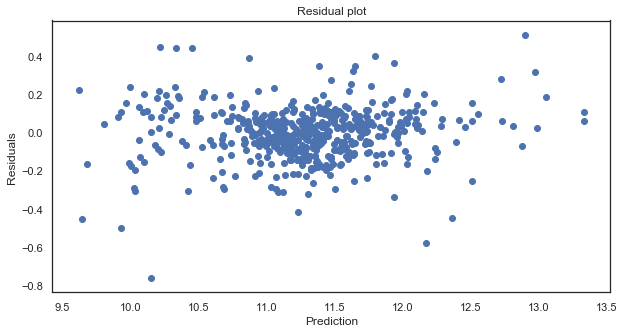

In [561]:
# Defining Graph size
plt.figure(figsize=(10,5))

# Defining the residue and model predicted results
df_categorized_car_brands['PREDICTIONS'] = results.predict(X_test)
df_categorized_car_brands['RESIDUE'] = y_test - model_test_pred

# Plot your predicted values on the x-axis, and your residuals on the y-axis on Residue Plot
plt.scatter(df_categorized_car_brands['PREDICTIONS'], df_categorized_car_brands['RESIDUE'])
plt.title("Residual plot")
plt.xlabel("Prediction")
plt.ylabel("Residuals")

## Section 6.2: QQ Plot

C:\Users\User\.conda\envs\metis\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\User\.conda\envs\metis\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\User\.conda\envs\metis\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Text(0.5, 1.0, 'Normal Q-Q plot')

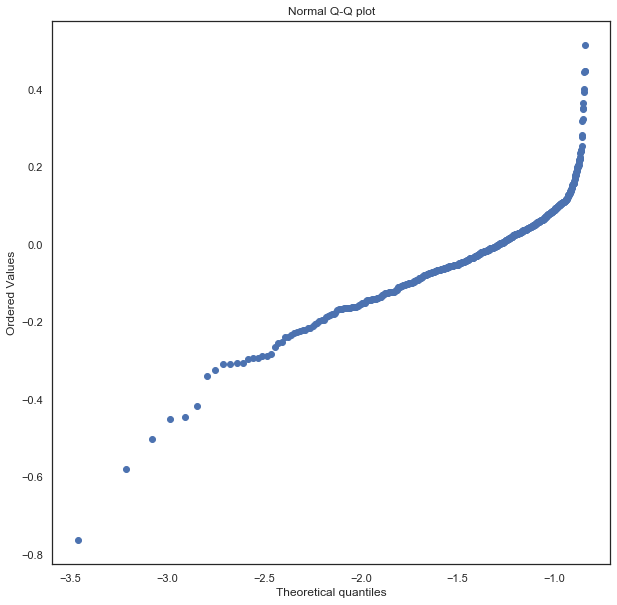

In [562]:
# Defining the residue and model predicted results
df_categorized_car_brands['PREDICTIONS'] = results.predict(X_test)
df_categorized_car_brands['RESIDUE'] = y_test - model_test_pred

# diagnose/inspect residual normality using QQplot:
plt.figure(figsize=(10,10))
stats.probplot(df_categorized_car_brands['RESIDUE'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")

In [ ]:
# df.corr() -> just use this to remove PREDICTOR VARIABLES that are highly correlated
# when do we do lasso/elastic net? (figure it out)

# plot a row in the pairplot () -> separate a df for this pairplot consideration

# Get the correlations with 'price' sorted in descending order
# cars.corr()['price'].sort_values(ascending=False)


# so only take out the target y to predictor variable

In [ ]:
# Interesting insights from data:
# Mercedes-BENZ actually second highest sold car. Highest resale? More things we can look into for this

In [56]:
# Future Ideas:
# Plot GDP against Trends of bought Mercedes